In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/DATA SCIENTIST/P5')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')

In [5]:
list_data_set = [customers,geolocalisation,order_items,order_payments,order_reviews,orders,products,sellers,translation]

In [6]:
dic_data_set={'customers':customers,'geolocalisation':geolocalisation,'order_items':order_items,'order_payments':order_payments,'order_reviews':order_reviews,'orders':orders,'products':products,'sellers':sellers,'translation':translation}

In [ ]:
order_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

##Exploration

In [7]:
#NaN par indicateur et par entrée, affiche les histo correspondant et renvoi un panda pour les indicateurs et les entrée avec leur taux de nan

def tau_nan(setframe):
  frame=setframe.copy()
  
  #par indicateur  
  taux_Nan_ind = [] 
  for i in range(len(frame.columns)): 
      taux_Nan_ind.append(frame[frame.columns[i]].isnull().sum()/len(frame)*100)
  
  data_NaN_indi=pd.DataFrame({'Indicateur': frame.columns, 'Taux NaN' : taux_Nan_ind})
  print('taux de NaN par indicateur:')
  data_NaN_indi['Taux NaN'].hist()
  plt.show()
  
  #par entrée
  taux_Nan_ent = [] 
  for i in range(len(frame)):
    taux_Nan_ent.append(frame.iloc[i].isnull().sum()/(len(frame.columns))*100)

  data_NaN_ent=pd.DataFrame({'Entrée': frame.index, 'Taux NaN' : taux_Nan_ent})
  print('taux de NaN par entrée:')
  data_NaN_ent['Taux NaN'].hist()
  plt.show()

  return data_NaN_indi, data_NaN_ent

In [ ]:
def analyse_uni (frame):
    
    for cat in frame.select_dtypes(['int64', 'float64']).columns:
        
      print('pour la catégorie :', str(cat))
      print("-"*20)
      print("Max:\n",frame[cat].max())#max
      print("min:\n",frame[cat].min())#min
      print("moy:\n",frame[cat].mean())#moyenne
      print("med:\n",frame[cat].median())#mediane
      print("mod:\n",frame[cat].mode())#modale
      print("var:\n",frame[cat].var(ddof=0))#variance
      print("ect:\n",frame[cat].std(ddof=0))#ecart type
      print("skw:\n",frame[cat].skew())#asymétrie
      print("kur:\n",frame[cat].kurtosis())#aplatissement
      print("-"*20)
      

      f, axes = plt.subplots(1,2, figsize=(12,4))
      titre = 'Distribution de ' + str(cat)
      plt.title(titre)
      sns.distplot(frame[cat], bins=30, ax=axes[0])
      titre = 'Distribution de ' + str(cat)
      plt.title(titre)
      sns.boxplot(frame[cat], ax=axes[1])
      plt.show()

    for cat in frame.columns:
      print('nb entrée unique pour l\'indicateur :', str(cat),': \n', frame[cat].nunique())

In [ ]:
def explor_set (dic_set):
  #Nécessite les fonctions tau_nan et analyse_uni
  #donne en entrée un dico de data set avec leur nom
  for name,set in dic_set.items():
    print(name)
    print('\n')
    print(set.head(3))
    print('-'*45)
    print('format : ')
    print (set.shape)
    print('-'*45)
    print('Nom des indicateurs :')
    print(set.columns)
    print('-'*45)
    tau_nan(set)
    print('-'*45)
    print('nb doublons :')
    print(set.duplicated().sum())
    print('-'*45)
    analyse_uni(set)
    print('-'*45)
    print('-'*90)
    print('\n')

customers


                        customer_id  ... customer_state
0  06b8999e2fba1a1fbc88172c00ba8bc7  ...             SP
1  18955e83d337fd6b2def6b18a428ac77  ...             SP
2  4e7b3e00288586ebd08712fdd0374a03  ...             SP

[3 rows x 5 columns]
---------------------------------------------
format : 
(99441, 5)
---------------------------------------------
Nom des indicateurs :
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
---------------------------------------------
taux de NaN par indicateur:


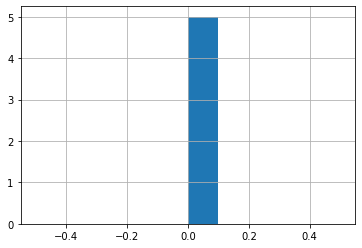

taux de NaN par entrée:


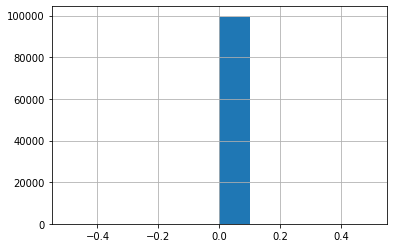

---------------------------------------------
nb doublons :
0
---------------------------------------------
pour la catégorie : customer_zip_code_prefix
--------------------
Max:
 99990
min:
 1003
moy:
 35137.47458291851
med:
 24416.0
mod:
 0    22790
dtype: int64
var:
 887908239.3363756
ect:
 29797.789168600673
skw:
 0.7790250646607622
kur:
 -0.7882039256354707
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


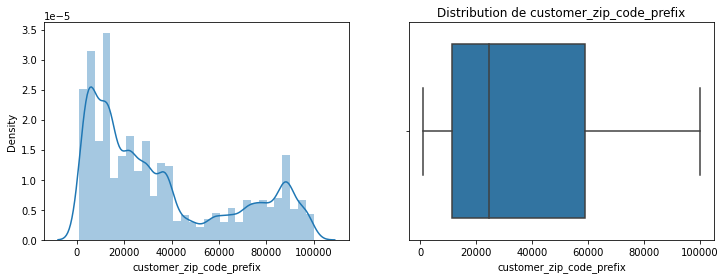

nb entrée unique pour l'indicateur : customer_id : 
 99441
nb entrée unique pour l'indicateur : customer_unique_id : 
 96096
nb entrée unique pour l'indicateur : customer_zip_code_prefix : 
 14994
nb entrée unique pour l'indicateur : customer_city : 
 4119
nb entrée unique pour l'indicateur : customer_state : 
 27
---------------------------------------------
------------------------------------------------------------------------------------------


geolocalisation


   geolocation_zip_code_prefix  ...  geolocation_state
0                         1037  ...                 SP
1                         1046  ...                 SP
2                         1046  ...                 SP

[3 rows x 5 columns]
---------------------------------------------
format : 
(1000163, 5)
---------------------------------------------
Nom des indicateurs :
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
-

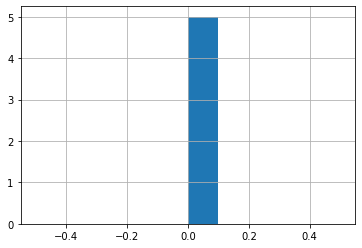

taux de NaN par entrée:


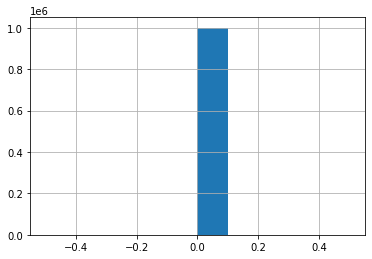

---------------------------------------------
nb doublons :
261831
---------------------------------------------
pour la catégorie : geolocation_zip_code_prefix
--------------------
Max:
 99990
min:
 1001
moy:
 36574.16646586607
med:
 26530.0
mod:
 0    24220
dtype: int64
var:
 933260979.2322766
ect:
 30549.320438141935
skw:
 0.6944941943729727
kur:
 -0.941226007209337
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


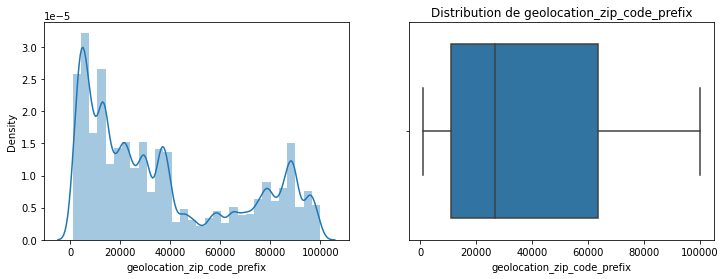

pour la catégorie : geolocation_lat
--------------------
Max:
 45.06593318269697
min:
 -36.6053744107061
moy:
 -21.176152910383106
med:
 -22.91937749486411
mod:
 0   -27.102099
dtype: float64
var:
 32.67109499453447
ect:
 5.715863451354876
skw:
 1.5651466685710138
kur:
 2.850097460559739
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


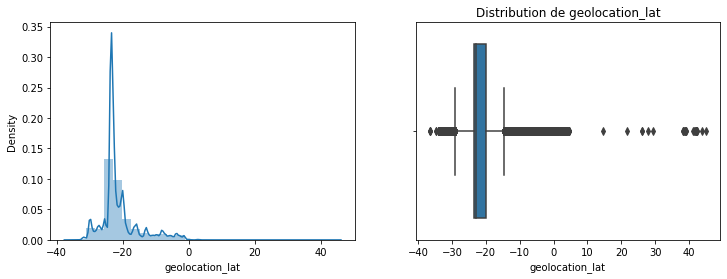

pour la catégorie : geolocation_lng
--------------------
Max:
 121.10539381057764
min:
 -101.46676644931476
moy:
 -46.390541320935995
med:
 -46.63787866960149
mod:
 0   -48.629613
dtype: float64
var:
 18.23073237410164
ect:
 4.2697461720928604
skw:
 -0.10241684959296561
kur:
 4.727050624951001
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


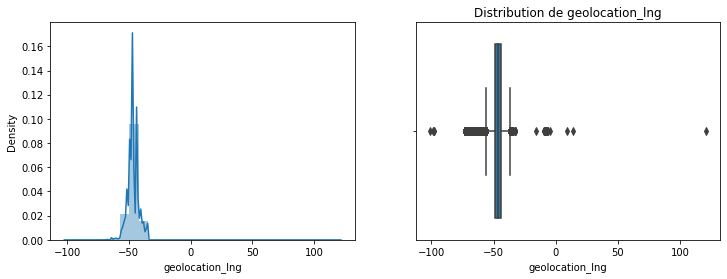

nb entrée unique pour l'indicateur : geolocation_zip_code_prefix : 
 19015
nb entrée unique pour l'indicateur : geolocation_lat : 
 717358
nb entrée unique pour l'indicateur : geolocation_lng : 
 717613
nb entrée unique pour l'indicateur : geolocation_city : 
 8011
nb entrée unique pour l'indicateur : geolocation_state : 
 27
---------------------------------------------
------------------------------------------------------------------------------------------


order_items


                           order_id  order_item_id  ...  price freight_value
0  00010242fe8c5a6d1ba2dd792cb16214              1  ...   58.9         13.29
1  00018f77f2f0320c557190d7a144bdd3              1  ...  239.9         19.93
2  000229ec398224ef6ca0657da4fc703e              1  ...  199.0         17.87

[3 rows x 7 columns]
---------------------------------------------
format : 
(112650, 7)
---------------------------------------------
Nom des indicateurs :
Index(['order_id', 'order_item_id', 'product_id', 'se

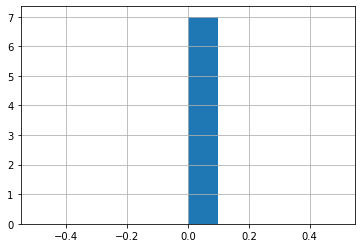

taux de NaN par entrée:


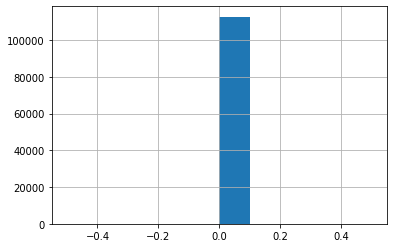

---------------------------------------------
nb doublons :
0
---------------------------------------------
pour la catégorie : order_item_id
--------------------
Max:
 21
min:
 1
moy:
 1.1978339991122948
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.49719548598185404
ect:
 0.7051209016770486
skw:
 7.580355726011262
kur:
 103.85736059917143
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


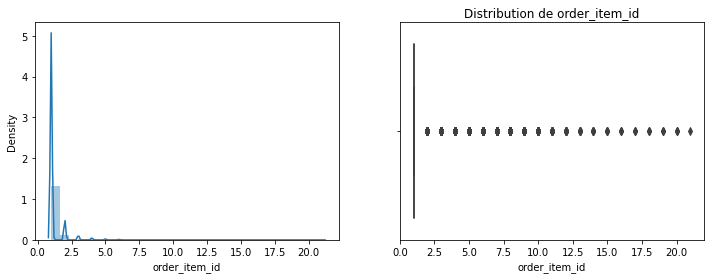

pour la catégorie : price
--------------------
Max:
 6735.0
min:
 0.85
moy:
 120.65373901477311
med:
 74.99
mod:
 0    59.9
dtype: float64
var:
 33721.120184343585
ect:
 183.6331129844059
skw:
 7.92320826321351
kur:
 120.82829811136266
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


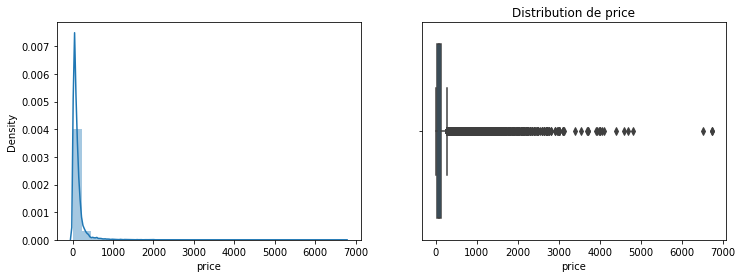

pour la catégorie : freight_value
--------------------
Max:
 409.68
min:
 0.0
moy:
 19.99031992898562
med:
 16.26
mod:
 0    15.1
dtype: float64
var:
 249.84023419324407
ect:
 15.806335254993298
skw:
 5.639869620428684
kur:
 59.78825261835198
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


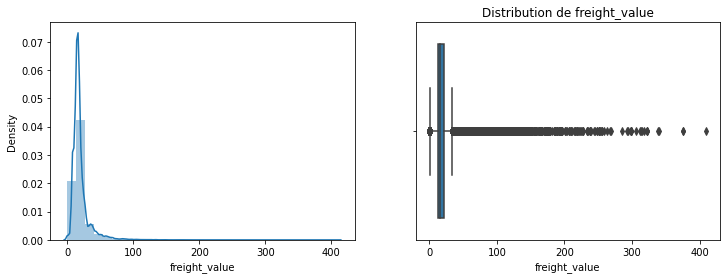

nb entrée unique pour l'indicateur : order_id : 
 98666
nb entrée unique pour l'indicateur : order_item_id : 
 21
nb entrée unique pour l'indicateur : product_id : 
 32951
nb entrée unique pour l'indicateur : seller_id : 
 3095
nb entrée unique pour l'indicateur : shipping_limit_date : 
 93318
nb entrée unique pour l'indicateur : price : 
 5968
nb entrée unique pour l'indicateur : freight_value : 
 6999
---------------------------------------------
------------------------------------------------------------------------------------------


order_payments


                           order_id  ...  payment_value
0  b81ef226f3fe1789b1e8b2acac839d17  ...          99.33
1  a9810da82917af2d9aefd1278f1dcfa0  ...          24.39
2  25e8ea4e93396b6fa0d3dd708e76c1bd  ...          65.71

[3 rows x 5 columns]
---------------------------------------------
format : 
(103886, 5)
---------------------------------------------
Nom des indicateurs :
Index(['order_id', 'payment_sequential', 'payment_type'

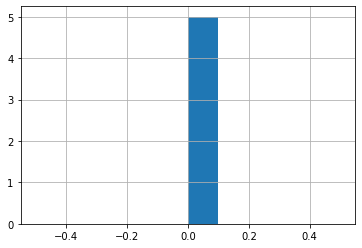

taux de NaN par entrée:


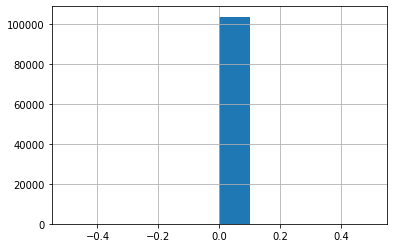

---------------------------------------------
nb doublons :
0
---------------------------------------------
pour la catégorie : payment_sequential
--------------------
Max:
 29
min:
 1
moy:
 1.0926785129853878
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.49925583116978367
ect:
 0.7065803784211557
skw:
 16.1800647173527
kur:
 370.5938087869398
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


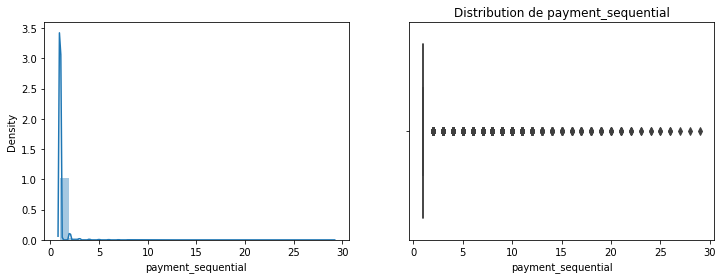

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pour la catégorie : payment_installments
--------------------
Max:
 24
min:
 0
moy:
 2.853348863176944
med:
 1.0
mod:
 0    1
dtype: int64
var:
 7.220171822286798
ect:
 2.6870377411355424
skw:
 1.6550737635551802
kur:
 2.5500479292629437
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


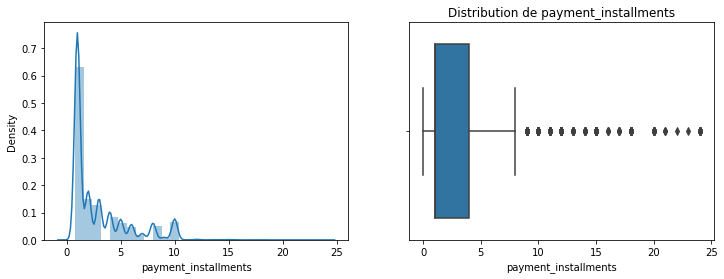

pour la catégorie : payment_value
--------------------
Max:
 13664.08
min:
 0.0
moy:
 154.10038041698365
med:
 100.0
mod:
 0    50.0
dtype: float64
var:
 47303.21247430867
ect:
 217.49301707022383
skw:
 9.254009528478063
kur:
 241.8284419145052
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


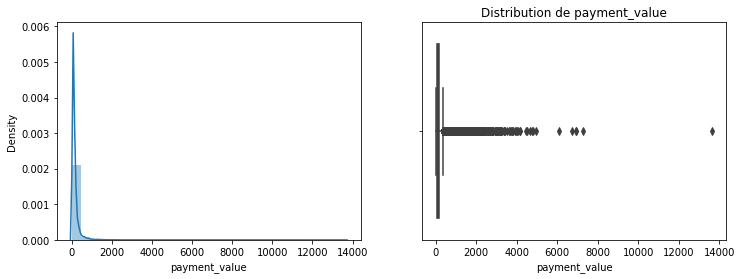

nb entrée unique pour l'indicateur : order_id : 
 99440
nb entrée unique pour l'indicateur : payment_sequential : 
 29
nb entrée unique pour l'indicateur : payment_type : 
 5
nb entrée unique pour l'indicateur : payment_installments : 
 24
nb entrée unique pour l'indicateur : payment_value : 
 29077
---------------------------------------------
------------------------------------------------------------------------------------------


order_reviews


                          review_id  ... review_answer_timestamp
0  7bc2406110b926393aa56f80a40eba40  ...     2018-01-18 21:46:59
1  80e641a11e56f04c1ad469d5645fdfde  ...     2018-03-11 03:05:13
2  228ce5500dc1d8e020d8d1322874b6f0  ...     2018-02-18 14:36:24

[3 rows x 7 columns]
---------------------------------------------
format : 
(100000, 7)
---------------------------------------------
Nom des indicateurs :
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date

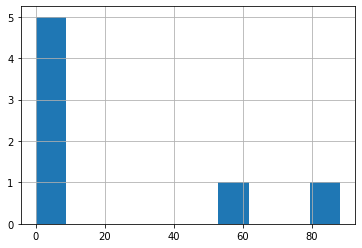

taux de NaN par entrée:


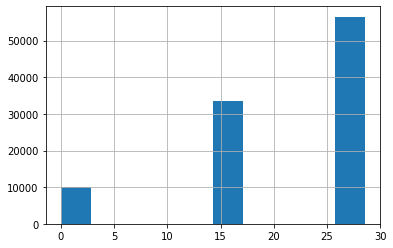

---------------------------------------------
nb doublons :
0
---------------------------------------------
pour la catégorie : review_score
--------------------
Max:
 5
min:
 1
moy:
 4.07089
med:
 5.0
mod:
 0    5
dtype: int64
var:
 1.848664607901602
ect:
 1.3596560623560658
skw:
 -1.3378269034146675
kur:
 0.41696043637916436
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


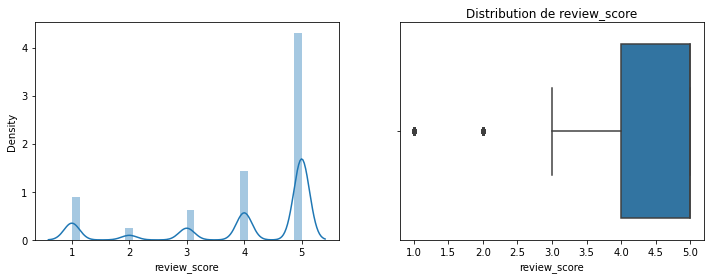

nb entrée unique pour l'indicateur : review_id : 
 99173
nb entrée unique pour l'indicateur : order_id : 
 99441
nb entrée unique pour l'indicateur : review_score : 
 5
nb entrée unique pour l'indicateur : review_comment_title : 
 4600
nb entrée unique pour l'indicateur : review_comment_message : 
 36921
nb entrée unique pour l'indicateur : review_creation_date : 
 637
nb entrée unique pour l'indicateur : review_answer_timestamp : 
 99010
---------------------------------------------
------------------------------------------------------------------------------------------


orders


                           order_id  ... order_estimated_delivery_date
0  e481f51cbdc54678b7cc49136f2d6af7  ...           2017-10-18 00:00:00
1  53cdb2fc8bc7dce0b6741e2150273451  ...           2018-08-13 00:00:00
2  47770eb9100c2d0c44946d9cf07ec65d  ...           2018-09-04 00:00:00

[3 rows x 8 columns]
---------------------------------------------
format : 
(99441, 8)
------------------------------------

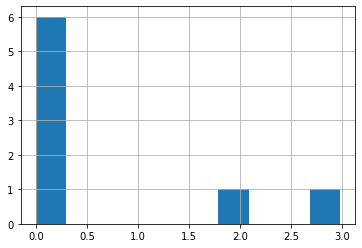

taux de NaN par entrée:


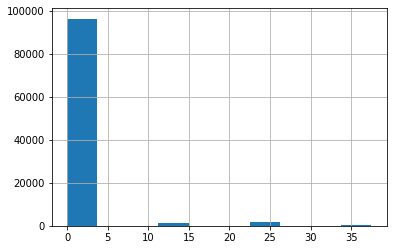

---------------------------------------------
nb doublons :
0
---------------------------------------------
nb entrée unique pour l'indicateur : order_id : 
 99441
nb entrée unique pour l'indicateur : customer_id : 
 99441
nb entrée unique pour l'indicateur : order_status : 
 8
nb entrée unique pour l'indicateur : order_purchase_timestamp : 
 98875
nb entrée unique pour l'indicateur : order_approved_at : 
 90733
nb entrée unique pour l'indicateur : order_delivered_carrier_date : 
 81018
nb entrée unique pour l'indicateur : order_delivered_customer_date : 
 95664
nb entrée unique pour l'indicateur : order_estimated_delivery_date : 
 459
---------------------------------------------
------------------------------------------------------------------------------------------


products


                         product_id  ... product_width_cm
0  1e9e8ef04dbcff4541ed26657ea517e5  ...             14.0
1  3aa071139cb16b67ca9e5dea641aaa2f  ...             20.0
2  96bd76ec8810374ed1b65e2919757

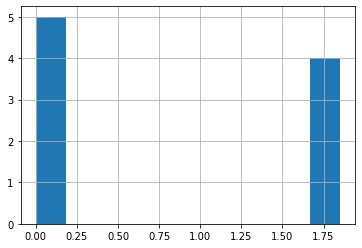

taux de NaN par entrée:


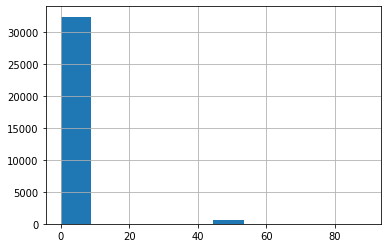

---------------------------------------------
nb doublons :
0
---------------------------------------------
pour la catégorie : product_name_lenght
--------------------
Max:
 76.0
min:
 5.0
moy:
 48.47694876472589
med:
 51.0
mod:
 0    60.0
dtype: float64
var:
 104.97195712266974
ect:
 10.245582322282601
skw:
 -0.903221758762539
kur:
 0.19256346035140837
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


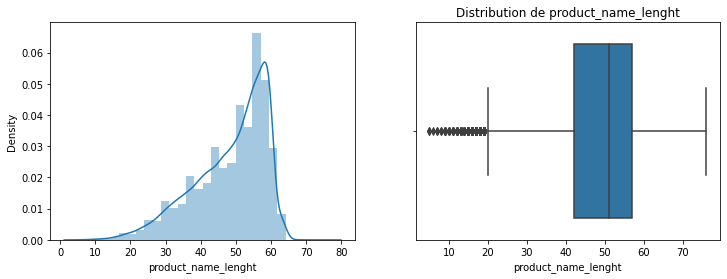

pour la catégorie : product_description_lenght
--------------------
Max:
 3992.0
min:
 4.0
moy:
 771.4952846232337
med:
 595.0
mod:
 0    404.0
dtype: float64
var:
 403358.8761179599
ect:
 635.1054055178242
skw:
 1.962092763448352
kur:
 4.828922832039819
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


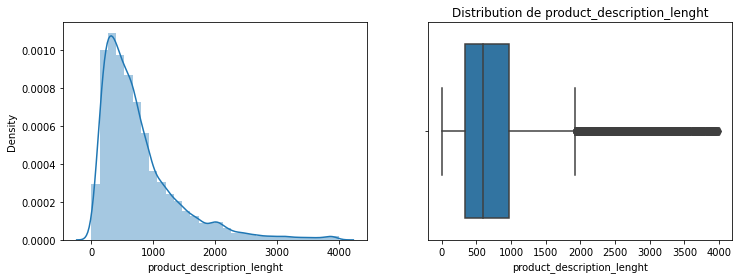

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pour la catégorie : product_photos_qty
--------------------
Max:
 20.0
min:
 1.0
moy:
 2.1889861166939797
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 3.016261613888302
ect:
 1.7367387868900441
skw:
 2.19340913301457
kur:
 7.263534231797978
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


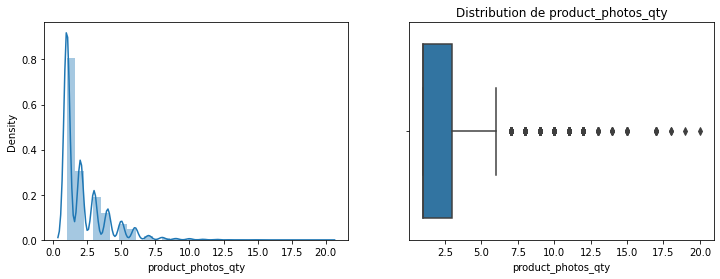

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pour la catégorie : product_weight_g
--------------------
Max:
 40425.0
min:
 0.0
moy:
 2276.4724877841513
med:
 700.0
mod:
 0    200.0
dtype: float64
var:
 18335299.20156871
ect:
 4281.973750686559
skw:
 3.604859782275307
kur:
 15.133564709584677
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


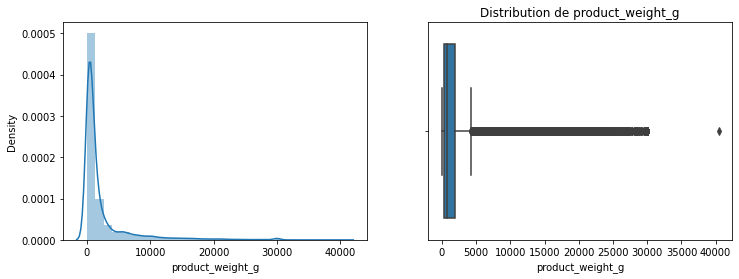

pour la catégorie : product_length_cm
--------------------
Max:
 105.0
min:
 7.0
moy:
 30.81507784758263
med:
 25.0
mod:
 0    16.0
dtype: float64
var:
 286.09020818011044
ect:
 16.914201375770315
skw:
 1.7504597083360067
kur:
 3.513618042445098
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


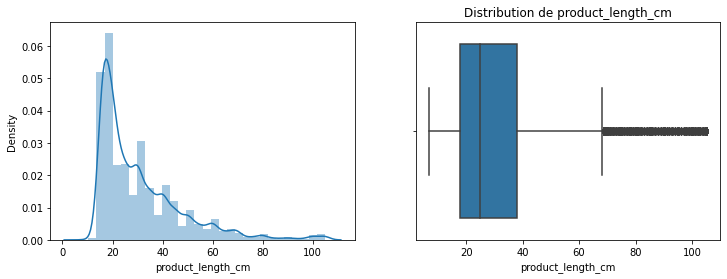

pour la catégorie : product_height_cm
--------------------
Max:
 105.0
min:
 2.0
moy:
 16.937661234028347
med:
 13.0
mod:
 0    10.0
dtype: float64
var:
 185.97723621885325
ect:
 13.637347110741636
skw:
 2.1400612809133093
kur:
 6.678618937772553
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


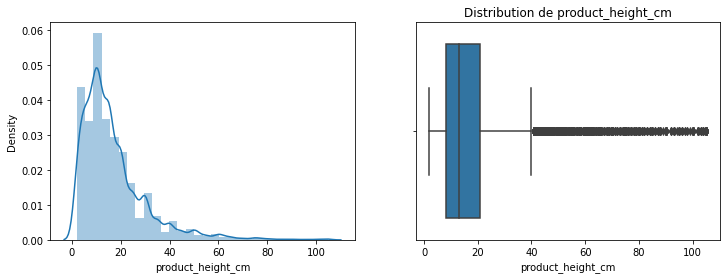

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pour la catégorie : product_width_cm
--------------------
Max:
 118.0
min:
 6.0
moy:
 23.196728277034204
med:
 20.0
mod:
 0    11.0
dtype: float64
var:
 145.8989592190494
ect:
 12.07886415268627
skw:
 1.6709713361516598
kur:
 4.073125916884521
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


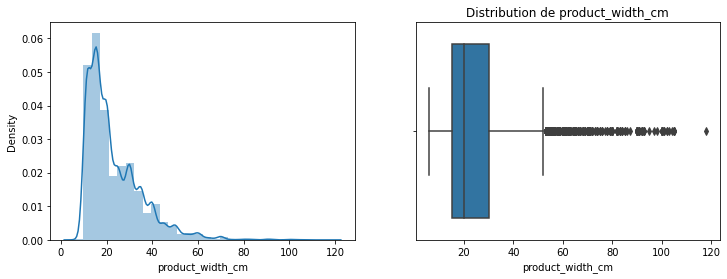

nb entrée unique pour l'indicateur : product_id : 
 32951
nb entrée unique pour l'indicateur : product_category_name : 
 73
nb entrée unique pour l'indicateur : product_name_lenght : 
 66
nb entrée unique pour l'indicateur : product_description_lenght : 
 2960
nb entrée unique pour l'indicateur : product_photos_qty : 
 19
nb entrée unique pour l'indicateur : product_weight_g : 
 2204
nb entrée unique pour l'indicateur : product_length_cm : 
 99
nb entrée unique pour l'indicateur : product_height_cm : 
 102
nb entrée unique pour l'indicateur : product_width_cm : 
 95
---------------------------------------------
------------------------------------------------------------------------------------------


sellers


                          seller_id  ...  seller_state
0  3442f8959a84dea7ee197c632cb2df15  ...            SP
1  d1b65fc7debc3361ea86b5f14c68d2e2  ...            SP
2  ce3ad9de960102d0677a81f5d0bb7b2d  ...            RJ

[3 rows x 4 columns]
------------------------------------

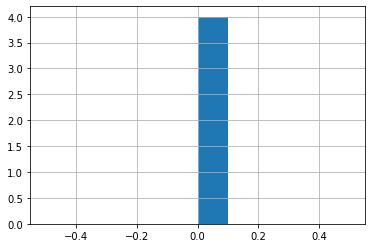

taux de NaN par entrée:


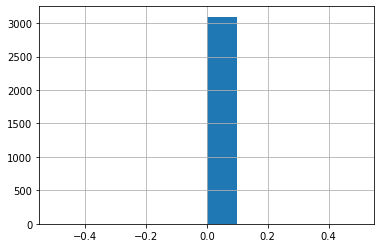

---------------------------------------------
nb doublons :
0
---------------------------------------------
pour la catégorie : seller_zip_code_prefix
--------------------
Max:
 99730
min:
 1001
moy:
 32291.059450726978
med:
 14940.0
mod:
 0    14940
dtype: int64
var:
 1069824287.6068094
ect:
 32708.16851501792
skw:
 0.916091733507867
kur:
 -0.858263891728237
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


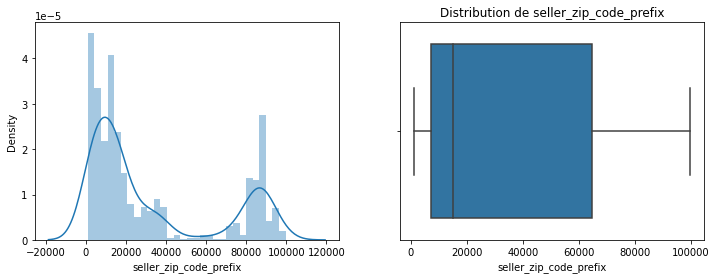

nb entrée unique pour l'indicateur : seller_id : 
 3095
nb entrée unique pour l'indicateur : seller_zip_code_prefix : 
 2246
nb entrée unique pour l'indicateur : seller_city : 
 611
nb entrée unique pour l'indicateur : seller_state : 
 23
---------------------------------------------
------------------------------------------------------------------------------------------


translation


    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
---------------------------------------------
format : 
(71, 2)
---------------------------------------------
Nom des indicateurs :
Index(['product_category_name', 'product_category_name_english'], dtype='object')
---------------------------------------------
taux de NaN par indicateur:


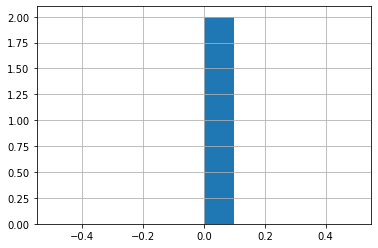

taux de NaN par entrée:


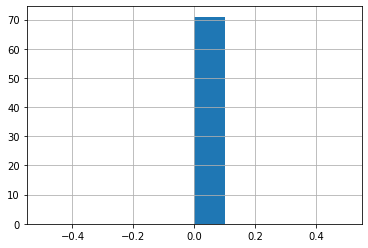

---------------------------------------------
nb doublons :
0
---------------------------------------------
nb entrée unique pour l'indicateur : product_category_name : 
 71
nb entrée unique pour l'indicateur : product_category_name_english : 
 71
---------------------------------------------
------------------------------------------------------------------------------------------




In [ ]:
explor_set(dic_data_set)

In [ ]:
### NB DE CLIENT :
customers['customer_unique_id'].nunique()

96096

In [ ]:
### NB de vendeur
sellers['seller_id'].nunique()

3095

In [ ]:
###Nb de commande
orders['order_id'].nunique()

99441

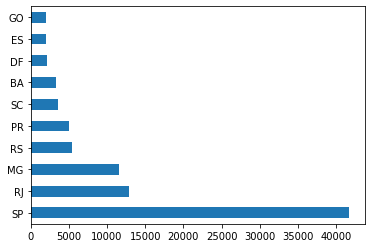

In [ ]:
### Répartition des commandes par pays
customers['customer_state'].value_counts().head(10).plot.barh()

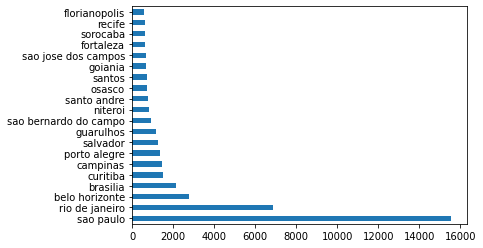

In [ ]:
### Répartition des commandes par ville
customers['customer_city'].value_counts().head(20).plot.barh()

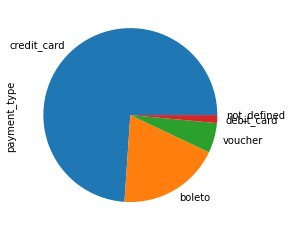

In [ ]:
###Répartition des moyens de paiement 
order_payments['payment_type'].value_counts().plot.pie()

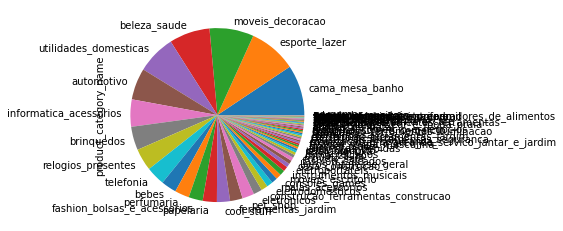

In [ ]:
### Répartition du nombre de produit vendu par catégorie
products['product_category_name'].value_counts().plot.pie()


In [ ]:
products['product_category_name'].nunique()

73

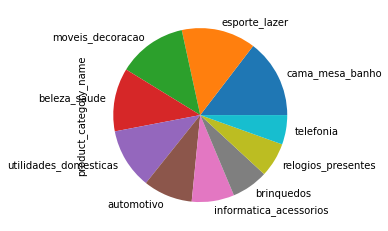

In [ ]:
### Répartition du nombre de produit vendu des 10 plus grandes catégories
products['product_category_name'].value_counts().head(10).plot.pie()

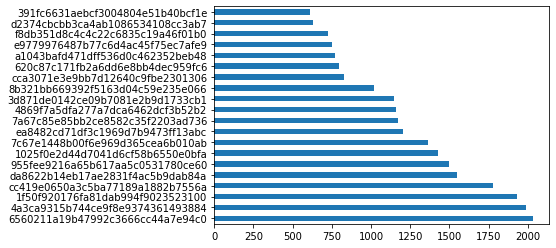

In [ ]:
###Nb de commande chez les 20 meilleurs vendeurs
order_items['seller_id'].value_counts().head(20).plot.barh()

## Mapping des catégories

In [ ]:
translation['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [ ]:
dict_categories = {
    
#health_beauty
'health_beauty' : 'health_beauty', 
'baby': 'health_beauty',
'diapers_and_hygiene' : 'health_beauty',
'perfumery' : 'health_beauty',    

#home
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'christmas_supplies' : 'home',
    
#construction
'construction_tools_construction': 'construction',
'costruction_tools_garden': 'construction',
'costruction_tools_tools': 'construction',
'construction_tools_safety': 'construction',
'construction_tools_lights': 'construction',
'home_construction': 'construction',
'air_conditioning': 'construction',
'auto' : 'construction',
   
#office
'office_furniture' : 'office',
'industry_commerce_and_business' : 'office',
'stationery' : 'office',
'agro_industry_and_commerce' : 'office',
'signaling_and_security' : 'office',
'furnitures' : 'office',
'security_and_services' : 'office',

#food
'food_drink' : 'food',
'food' : 'food',
'drinks' : 'food',

#electronics
'telephony' : 'electronics',
'electronics': 'electronics',
'computers_accessories': 'electronics',
'consoles_games': 'electronics',
'fixed_telephony': 'electronics',
'audio': 'electronics',
'computers': 'electronics',
'tablets_printing_image': 'electronics',

#appliances
'small_appliances' : 'appliances',
'small_appliances_home_oven_and_coffee' : 'appliances',
'home_appliances_2' : 'appliances',
'home_appliances' : 'appliances',
'housewares' : 'appliances',

#fashion
'watches_gifts' : 'fashion',
'fashion_bags_accessories' : 'fashion',
'fashion_underwear_beach' : 'fashion',
'fashion_shoes' : 'fashion', 
'fashion_male_clothing' : 'fashion',
'fashio_female_clothing' : 'fashion',
'fashion_sport' : 'fashion',
'fashion_childrens_clothes' : 'fashion',
'luggage_accessories': 'fashion',

#garden and pets
'flowers' : 'garden_pets',
'pet_shop' : 'garden_pets',
'garden_tools' : 'garden_pets',

#activities
'sports_leisure' : 'activities',
'musical_instruments': 'activities',
'party_supplies': 'activities',
'books' : 'activities',
'books_imported': 'activities',
'books_general_interest': 'activities',
'books_technical': 'activities',
'art': 'activities',
'toys': 'activities',
'cine_photo': 'activities',
'cds_dvds_musicals': 'activities',
'music': 'activities',
'dvds_blu_ray': 'activities',
'arts_and_craftmanship': 'activities',

#other
'Unknown' : 'other',
'market_place' : 'other', 
'cool_stuff' : 'other'}

In [ ]:
translation['product_cat_global']=translation['product_category_name_english'].map(dict_categories)

In [ ]:
set_products=pd.merge(pd.merge(pd.merge(products, translation),order_items),orders)

In [ ]:
set_products=set_products.drop(['product_category_name','product_category_name_english'],axis=1)

In [ ]:
set_products['product_cat_global'].value_counts()

home             21011
electronics      17190
health_beauty    16193
activities       14782
fashion           9725
appliances        8728
construction      6904
garden_pets       6327
office            4889
other             4107
food              1167
Name: product_cat_global, dtype: int64

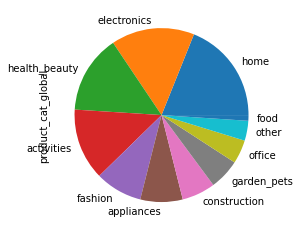

In [ ]:
set_products['product_cat_global'].value_counts().plot.pie()

##Distribution des achats dans le temps

In [ ]:
set_products=set_products.sort_values(by=['order_purchase_timestamp'])

In [ ]:
set_products['order_purchase_timestamp'] = set_products[
        'order_purchase_timestamp'].astype('datetime64')

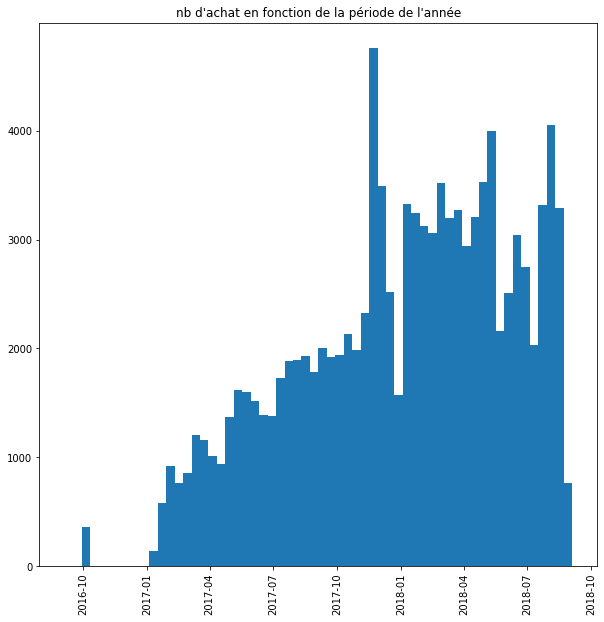

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(set_products['order_purchase_timestamp'],bins=60)
plt.xticks(rotation=90)
plt.title('nb d\'achat en fonction de la période de l\'année')
plt.show()

In [ ]:
list_cat_product=set_products['product_cat_global'].unique()

In [ ]:
list_cat_product

array(['home', 'electronics', 'health_beauty', 'fashion', 'activities',
       'appliances', 'construction', 'other', 'office', 'garden_pets',
       'food'], dtype=object)

catégorie: home


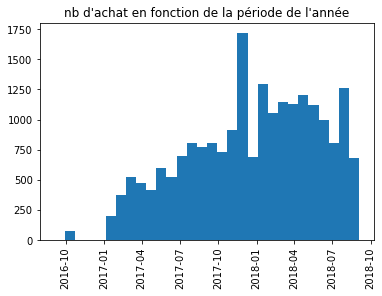

catégorie: electronics


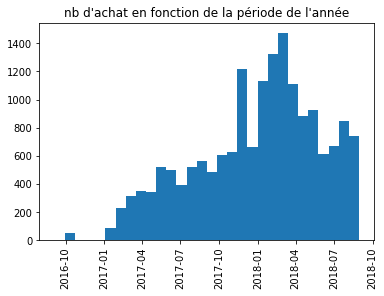

catégorie: health_beauty


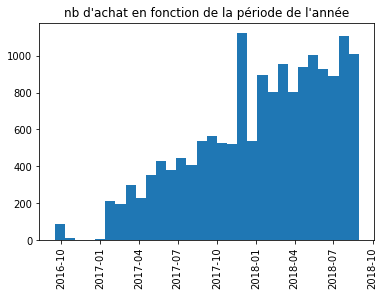

catégorie: fashion


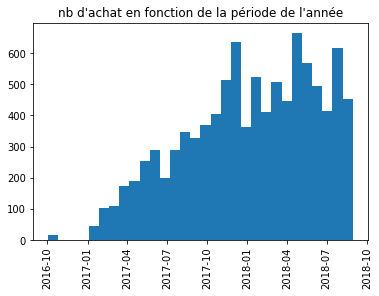

catégorie: activities


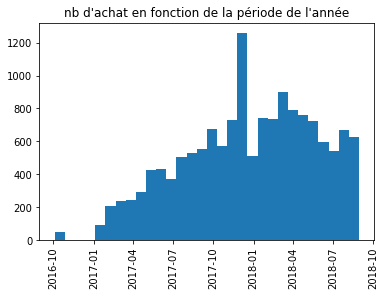

catégorie: appliances


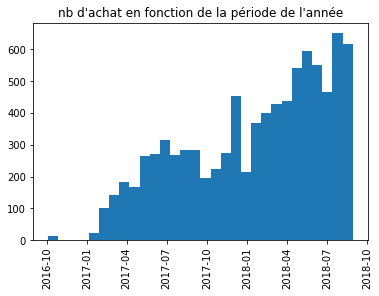

catégorie: construction


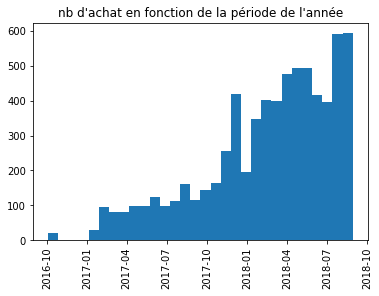

catégorie: other


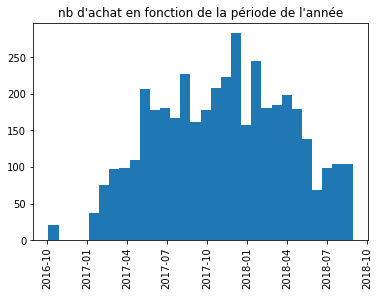

catégorie: office


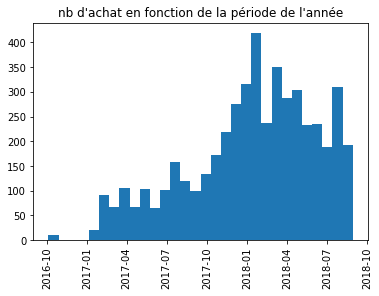

catégorie: garden_pets


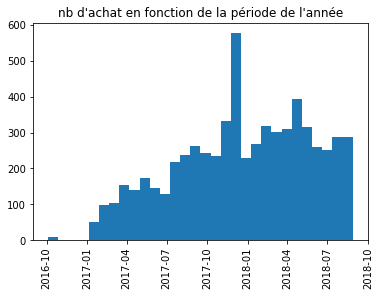

catégorie: food


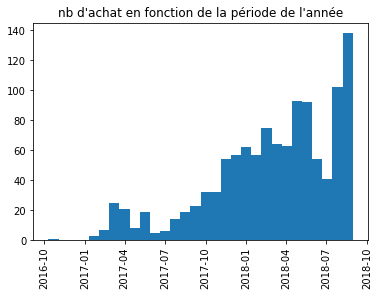

In [ ]:
for cat in list_cat_product:

  masque_cat=set_products['product_cat_global'] == cat
  set_cat=set_products[masque_cat]
  print('catégorie:', cat)
  plt.hist(set_cat['order_purchase_timestamp'],bins=30)
  plt.xticks(rotation=90)
  plt.title('nb d\'achat en fonction de la période de l\'année')
  plt.show()


#Création du data set de travail

### Pipeline de traitement des data sets

In [ ]:
### Fonction pour créer le data set de travail

def work_set(list_set):
  ##list_set : liste des 9 data set dans l'ordre suivant :
  ##customers,geolocalisation,order_items,order_payments,order_reviews,orders,products,sellers,translation

  final_data=pd.DataFrame()

  customers_set = list_set[0].copy()
  geolocalisation_set = list_set[1].copy()
  order_items_set  = list_set[2].copy()
  order_payments_set  = list_set[3].copy()
  order_reviews_set  = list_set[4].copy()
  orders_set  = list_set[5].copy()
  products_set = list_set[6].copy()
  sellers_set = list_set[7].copy()
  translation_set = list_set[8].copy()

  #supression des doublons :
  geolocalisation_set.drop_duplicates(inplace=True)
  geolocalisation_set=geolocalisation_set.groupby(['geolocation_zip_code_prefix']).mean()

  #traitement des Nans:
  order_reviews_set['review_comment_title'].fillna(' ',inplace=True)
  order_reviews_set['review_comment_message'].fillna(' ',inplace=True)
  orders_set['order_approved_at'].fillna(0, inplace=True) 
  orders_set['order_delivered_carrier_date'].fillna(0, inplace=True)
  orders_set['order_delivered_customer_date'].fillna(0, inplace=True)
  products_set['product_category_name'].fillna('Unkwown', inplace=True)
  products_set['product_name_lenght'].fillna(0, inplace=True)
  products_set['product_description_lenght'].fillna(0, inplace=True)
  products_set['product_photos_qty'].fillna(0, inplace=True)
  products_set['product_weight_g'].fillna(0, inplace=True)
  products_set['product_length_cm'].fillna(0, inplace=True)
  products_set['product_height_cm'].fillna(0, inplace=True)
  products_set['product_width_cm'].fillna(0, inplace=True)
  geolocalisation_set['geolocation_lat'].fillna(0, inplace=True)##
  geolocalisation_set['geolocation_lng'].fillna(0, inplace=True)##

  #rename en Zip_code:
  customers_set=customers_set.rename(columns={'customer_zip_code_prefix':'zip_code'})
  sellers_set=sellers_set.rename(columns={'seller_zip_code_prefix':'zip_code'})
  geolocalisation_set['zip_code']=geolocalisation_set.index

  #data de géoloc pour customers:
  customers_set=pd.merge(customers_set,geolocalisation_set,how='left')
  customers_set=customers_set.rename(columns={'geolocation_lat':'geo_customer_lat','geolocation_lng':'geo_customer_lng'})
  
  #data de géoloc pour sellers:
  sellers_set=pd.merge(sellers_set,geolocalisation_set,how='left')
  sellers_set=sellers_set.rename(columns={'geolocation_lat':'geo_seller_lat','geolocation_lng':'geo_seller_lng'})
  sellers_set=sellers_set.drop('zip_code',axis=1)

  #merge des data set:
  order_items_set=pd.merge(order_items_set,sellers_set,how='left')
  orders_set=pd.merge(orders_set,customers_set,how='left')
  orders_set=pd.merge(orders_set,order_items_set,how='left')
  orders_set=pd.merge(orders_set,order_payments_set,how='left')
  orders_set=pd.merge(orders_set,order_reviews_set,how='left')

  #Catégorisation des types de produit:
  dict_categories = {
   
  #health_beauty
  'health_beauty' : 'health_beauty', 
  'baby': 'health_beauty',
  'diapers_and_hygiene' : 'health_beauty',
  'perfumery' : 'health_beauty',    

  #home
  'furniture_living_room' : 'home',
  'furniture_mattress_and_upholstery' : 'home',
  'furniture_bedroom' : 'home',
  'furniture_decor' : 'home',
  'bed_bath_table' : 'home',
  'kitchen_dining_laundry_garden_furniture' : 'home',
  'la_cuisine' : 'home',
  'home_confort' : 'home',
  'home_comfort_2' : 'home',
  'christmas_supplies' : 'home',
      
  #construction
  'construction_tools_construction': 'construction',
  'costruction_tools_garden': 'construction',
  'costruction_tools_tools': 'construction',
  'construction_tools_safety': 'construction',
  'construction_tools_lights': 'construction',
  'home_construction': 'construction',
  'air_conditioning': 'construction',
  'auto' : 'construction',
    
  #office
  'office_furniture' : 'office',
  'industry_commerce_and_business' : 'office',
  'stationery' : 'office',
  'agro_industry_and_commerce' : 'office',
  'signaling_and_security' : 'office',
  'furnitures' : 'office',
  'security_and_services' : 'office',

  #food
  'food_drink' : 'food',
  'food' : 'food',
  'drinks' : 'food',

  #electronics
  'telephony' : 'electronics',
  'electronics': 'electronics',
  'computers_accessories': 'electronics',
  'consoles_games': 'electronics',
  'fixed_telephony': 'electronics',
  'audio': 'electronics',
  'computers': 'electronics',
  'tablets_printing_image': 'electronics',

  #appliances
  'small_appliances' : 'appliances',
  'small_appliances_home_oven_and_coffee' : 'appliances',
  'home_appliances_2' : 'appliances',
  'home_appliances' : 'appliances',
  'housewares' : 'appliances',

  #fashion
  'watches_gifts' : 'fashion',
  'fashion_bags_accessories' : 'fashion',
  'fashion_underwear_beach' : 'fashion',
  'fashion_shoes' : 'fashion', 
  'fashion_male_clothing' : 'fashion',
  'fashio_female_clothing' : 'fashion',
  'fashion_sport' : 'fashion',
  'fashion_childrens_clothes' : 'fashion',
  'luggage_accessories': 'fashion',

  #garden and pets
  'flowers' : 'garden_pets',
  'pet_shop' : 'garden_pets',
  'garden_tools' : 'garden_pets',

  #activities
  'sports_leisure' : 'activities',
  'musical_instruments': 'activities',
  'party_supplies': 'activities',
  'books' : 'activities',
  'books_imported': 'activities',
  'books_general_interest': 'activities',
  'books_technical': 'activities',
  'art': 'activities',
  'toys': 'activities',
  'cine_photo': 'activities',
  'cds_dvds_musicals': 'activities',
  'music': 'activities',
  'dvds_blu_ray': 'activities',
  'arts_and_craftmanship': 'activities',

  #other
  'Unknown' : 'other',
  'market_place' : 'other', 
  'cool_stuff' : 'other'}

  translation_set['product_cat_global']=translation_set['product_category_name_english'].map(dict_categories)
  orders_set=pd.merge(orders_set,pd.merge(products_set,translation_set,how='left'),how='left')
  orders_set=orders_set.drop(['product_category_name','product_category_name_english'],axis=1)
  
  #Suppression des entrée 'canceled'
  orders_set=orders_set[orders_set['order_status']!='canceled']

  #formatage des date et correction des erreurs date:
  list_date=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
             'order_estimated_delivery_date','review_creation_date','review_answer_timestamp','shipping_limit_date']
  min_order = orders_set['order_purchase_timestamp'].min()            
  for date in list_date:
    orders_set[date]=orders_set[date].astype('datetime64')
    orders_set=orders_set[orders_set[date]>=min_order]

  return orders_set

In [ ]:
data_work=work_set(list_data_set)

### Feature engineering

In [ ]:
def feature_customer_global (frame):
### ENTREE : frame == set de travail transfomer par la fonction work_set() (ou frame_time() )
  
  data_work_test=frame.copy()
  final_data=pd.DataFrame()

  #Distance entre customer et seller:
  data_work_test['distance_cust_sell']=((data_work_test ['geo_customer_lat']-data_work_test ['geo_seller_lat'])**2 + (data_work_test ['geo_customer_lng']- data_work_test ['geo_seller_lng'])**2)**(1/2)
  data_work_test['distance_cust_sell'].fillna(0,inplace=True)
  dist_custom_seller=data_work_test.groupby(['customer_unique_id','order_id'])['distance_cust_sell'].mean().groupby(
      ['customer_unique_id']).mean()
  final_data['distance_cust_sell']=dist_custom_seller

  #Nombre de commande par client
  final_data['nb_com_moy']=customers['customer_unique_id'].value_counts()

  #Nb moyen de produit par commande par client
  nb_pdt_com_moy=data_work_test.groupby(['customer_unique_id','order_id'])['order_item_id'].max().groupby(
      ['customer_unique_id']).mean()
  final_data['nb_pdt_com_moy']=nb_pdt_com_moy

  #Montant moyen des achats
  achats_moy = data_work_test.groupby(['customer_unique_id','order_id'])['price'].mean().groupby(['customer_unique_id']).mean()
  final_data['montant_moy']=achats_moy

  #Montant maximum des achats
  achats_max = data_work_test.groupby(['customer_unique_id', 'order_id'])['price'].max().groupby(['customer_unique_id']).max()
  final_data['montant_max']=achats_max

  #Note_Moy_Com
  note_moy = data_work_test.groupby(['customer_unique_id','order_id'])['review_score'].mean().groupby('customer_unique_id').mean()
  final_data['note_moy']=note_moy

  #heure moyenne d'achat
  data_work_test['heure_achat'] = data_work_test['order_purchase_timestamp'].apply(lambda x: x.hour)
  h_moy_achat =data_work_test[['customer_unique_id','order_id', 'heure_achat']].groupby(
      ['customer_unique_id','order_id'])['heure_achat'].mean().groupby('customer_unique_id').mean()
  final_data['heure_moy_achat']=h_moy_achat

  #heure du dernier achat
  date_achat =data_work_test[['customer_unique_id', 'order_purchase_timestamp']].groupby(['customer_unique_id']).max()
  final_data['heure_last_achat'] = date_achat['order_purchase_timestamp'].apply(lambda x: x.hour)

  #jour moyen d'achat
  data_work_test['jour_achat'] = data_work_test['order_purchase_timestamp'].apply(lambda x: x.weekday())
  j_moy_achat =data_work_test[['customer_unique_id','order_id', 'jour_achat']].groupby(
      ['customer_unique_id','order_id'])['jour_achat'].mean().groupby('customer_unique_id').mean()
  final_data['jour_moy_achat']=j_moy_achat

  #jour de la semaine du dernier achat
  final_data['jour_last_achat'] = date_achat['order_purchase_timestamp'].apply(lambda x: x.weekday())

  #nb jours depuis dernier achat
  date_achat['delai_dernier_achat'] = date_achat['order_purchase_timestamp'].max() -  date_achat['order_purchase_timestamp']
  final_data['delai_dernier_achat'] = date_achat['delai_dernier_achat'].apply(lambda x: x.days)

  #delais entre la 1ere et derniere commande
  delai_achat=pd.DataFrame()
  date_achat_max =data_work_test[['customer_unique_id','order_id', 'order_purchase_timestamp']].groupby(
      ['customer_unique_id','order_id'])['order_purchase_timestamp'].max().groupby(['customer_unique_id']).max()
  date_achat_min =data_work_test[['customer_unique_id','order_id', 'order_purchase_timestamp']].groupby(
      ['customer_unique_id','order_id'])['order_purchase_timestamp'].min().groupby(['customer_unique_id']).min()
  delai_achat['date_max']=date_achat_max
  delai_achat['date_min']=date_achat_min
  delai_achat['delais_com_min_max']=delai_achat['date_max']-delai_achat['date_min']
  final_data['delais_com_min_max'] = delai_achat['delais_com_min_max'].apply(lambda x: x.days)

  #Delai moyenne de livraison
  data_work_test['delai_livraison'] = data_work_test['order_delivered_customer_date'] - data_work_test['order_purchase_timestamp']
  data_work_test['nb_jour_livraison'] = data_work_test['delai_livraison'].apply(lambda x: x.days)
  delai_livrai_moy=data_work_test.groupby(['customer_unique_id','order_id'])['nb_jour_livraison'].mean().groupby(
      ['customer_unique_id']).mean()
  final_data['delai_livrai_moy']=delai_livrai_moy 

  #Achat et paiment dans chaque catégorie
  frame_cat=data_work_test[['customer_unique_id','product_cat_global','payment_type']].copy()
  frame_cat['product_cat_global']=frame_cat['product_cat_global'].fillna('other')
  frame_cat['payment_type']=frame_cat['payment_type'].fillna('not_defined')
  cat_order_id=[]
  cat_order_VC=[]
  pay_order_VC=[]
  cat_order_id_frame=pd.DataFrame()
  pay_order_id_frame=pd.DataFrame()

  for i in frame_cat['customer_unique_id'].unique():
    cat_order_id.append(i)
    cat_order_VC.append(frame_cat[frame_cat['customer_unique_id']==i]['product_cat_global'].value_counts())
    pay_order_VC.append(frame_cat[frame_cat['customer_unique_id']==i]['payment_type'].value_counts())

  cat_order_id_frame['customer_unique_id']=cat_order_id
  cat_order_VC_frame=pd.DataFrame(cat_order_VC)
  cat_order_VC_frame.set_index(cat_order_id_frame['customer_unique_id'],inplace=True)
  cat_order_VC_frame=cat_order_VC_frame.fillna(0)

  pay_order_id_frame['customer_unique_id']=cat_order_id
  pay_order_VC_frame=pd.DataFrame(pay_order_VC)
  pay_order_VC_frame.set_index(pay_order_id_frame['customer_unique_id'],inplace=True)
  pay_order_VC_frame=pay_order_VC_frame.fillna(0)
  
  
  #Catégorie la plus acheté par client
  cat_try_transpo=cat_order_VC_frame.T.copy()
  cat_list_transpo=[]
  cat_frame_transpo=pd.DataFrame()
  cat_list_id=[]
  cat_order_VC_frame=cat_order_VC_frame.fillna(0)

  for i in cat_try_transpo.columns:
    cat_try_transpo=cat_order_VC_frame.T.copy()
    xmax=cat_try_transpo[i].max()
    cat_try_transpo_index=cat_try_transpo.loc[cat_try_transpo[i]==xmax,:]
    cat_list_id.append(i)
    cat_list_transpo.append(cat_try_transpo_index.index[0])
  cat_frame_transpo['customer_unique_id']=cat_list_id
  cat_frame_transpo['cat_moy']=cat_list_transpo

  #Paiment le plus utilisé par client

  pay_try_transpo=pay_order_VC_frame.T.copy()
  pay_list_transpo=[]
  pay_order_VC_frame=pay_order_VC_frame.fillna(0)

  for i in pay_try_transpo.columns:
    pay_try_transpo=pay_order_VC_frame.T.copy()
    xmax=pay_try_transpo[i].max()
    pay_try_transpo_index=pay_try_transpo.loc[pay_try_transpo[i]==xmax,:]
    pay_list_transpo.append(pay_try_transpo_index.index[0])
  cat_frame_transpo['pay_moy']=pay_list_transpo
  cat_frame_transpo=cat_frame_transpo.reset_index(drop=False).sort_values(by=['customer_unique_id'])

  #merge catégorie paiement
  final_data=final_data.reset_index(drop=False)
  final_data=final_data.rename(columns={'index':'customer_unique_id'}).sort_values(by=['customer_unique_id'])
  cat_order_VC_frame=cat_order_VC_frame.reset_index(drop=False).sort_values(by=['customer_unique_id'])
  pay_order_VC_frame=pay_order_VC_frame.reset_index(drop=False).sort_values(by=['customer_unique_id'])
  final_data=pd.merge(final_data,pd.merge(cat_order_VC_frame,pd.merge(pay_order_VC_frame,cat_frame_transpo)))

  #Ajout des infos client de Custormer
  data_work_test=data_work_test.sort_values(by=['customer_unique_id'])
  final_data=pd.merge(final_data,data_work_test[['customer_unique_id','zip_code','customer_city','customer_state','geo_customer_lat','geo_customer_lng']],how='left')
  final_data=final_data.drop('index',axis=1)

  #passage au log 
  final_data['montant_moy']=np.log(final_data['montant_moy'])

  return final_data

In [ ]:
feature_data_global=feature_customer(data_work)

##Corrélation entre indicateur

In [ ]:
def heatmap_pearson(frame,v_max,v_min,v_centre):
### frame== data set 
### v_max== valeur max de l'échelle de chaleur
### v_min== valeur min de l'échelle de chaleur
### v_centre == centre de l'échelle de chaleur

  final_data_pears=frame.corr(method='pearson')
  #coupe en deux le heatmap
  mask = np.triu(np.ones_like(final_data_pears, dtype=np.bool))
  f, ax = plt.subplots(figsize=(22, 22))

  # couleur
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(final_data_pears, mask=mask, cmap=cmap, vmax=v_max,vmin=v_min, center=v_centre,
              square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

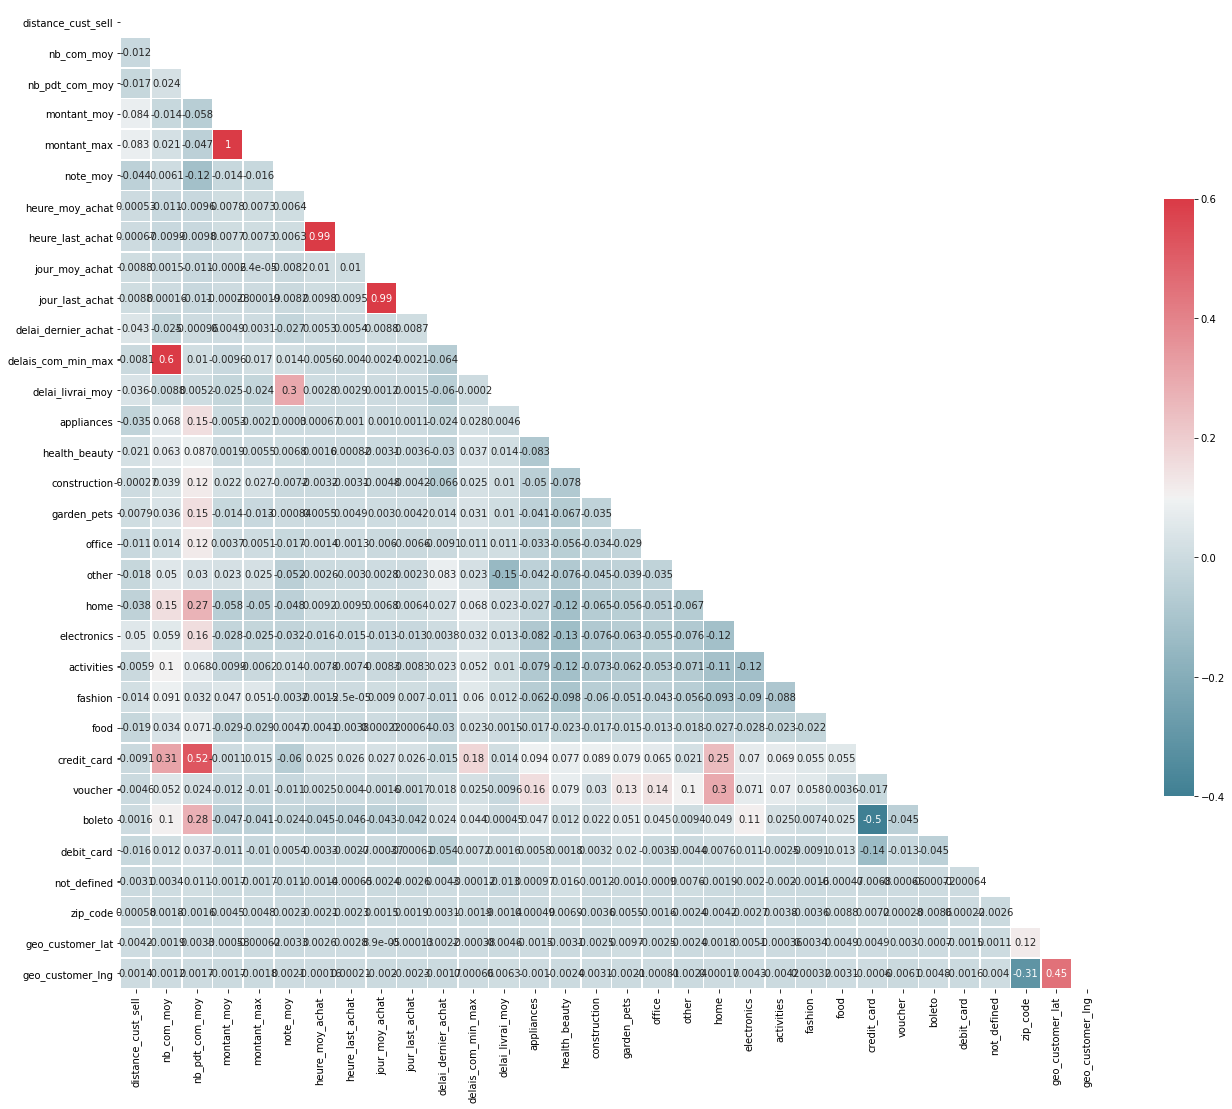

In [ ]:
heatmap_pearson(final_data_set,0.6,-0.4,0.1)

In [ ]:
### Suppression des indicateurs trop corélés
final_data_set=final_data_set.drop(['montant_max','heure_last_achat','jour_last_achat'],axis=1)

In [ ]:
### data set final avant l'écriture de la fonction
final_data_set.to_csv('P5_data_clean.csv')

## Data set sur tranche temporelle

In [ ]:
min_max_time=data_work.sort_values(by=['order_purchase_timestamp'])
min_time = min_max_time['order_purchase_timestamp'].min()
max_time = min_max_time['order_purchase_timestamp'].max()
print('les data commencent le :',min_time, 'et finissent le :', max_time)

les data commencent le : 2016-09-15 12:16:38 et finissent le : 2018-08-29 15:00:37


In [ ]:
## Nb de jours entre min et max
(max_time-min_time)

Timedelta('713 days 02:43:59')

In [ ]:
#nb de jours pour diviser le data set en 3
(max_time-min_time)/3

Timedelta('237 days 16:54:39.666666668')

In [ ]:
# liste de date pour interval de temps
import datetime
list_time=[]
list_time.append(min_time)

for i in range(1,4,1):
  list_time.append(min_time + i*datetime.timedelta(237))
list_time  

[Timestamp('2016-09-15 12:16:38'),
 Timestamp('2017-05-10 12:16:38'),
 Timestamp('2018-01-02 12:16:38'),
 Timestamp('2018-08-27 12:16:38')]

In [ ]:
def frame_time (frame,date_start,date_end):
### ENTREE : frame == set de travail; date_start == date de début ('AAAA-MM-JJ'); data_end == date de fin ('AAAA-MM-JJ')

  time_frame=frame.copy()
  time_start= date_start
  time_end=date_end

  time_frame=time_frame.sort_values(by=['order_purchase_timestamp'])
  masque_start=time_frame['order_purchase_timestamp']>=time_start 
  masque_end=time_frame['order_purchase_timestamp']<=time_end

  data_work_start=time_frame[masque_start]
  data_work_end=data_work_start[masque_end]

  return data_work_end


In [ ]:
### Comprend le retrait des features corrélées

def feature_customer (frame):
### ENTREE : frame == set de travail transfomer par la fonction work_set() (ou frame_time() )
  
  data_work_test=frame.copy()
  final_data=pd.DataFrame()

  #Distance entre customer et seller:
  data_work_test['distance_cust_sell']=((data_work_test ['geo_customer_lat']-data_work_test ['geo_seller_lat'])**2 + (data_work_test ['geo_customer_lng']- data_work_test ['geo_seller_lng'])**2)**(1/2)
  data_work_test['distance_cust_sell'].fillna(0,inplace=True)
  dist_custom_seller=data_work_test.groupby(['customer_unique_id','order_id'])['distance_cust_sell'].mean().groupby(
      ['customer_unique_id']).mean()
  final_data['distance_cust_sell']=dist_custom_seller

  #Nombre de commande par client
  final_data['nb_com_moy']=customers['customer_unique_id'].value_counts()

  #Nb moyen de produit par commande par client
  nb_pdt_com_moy=data_work_test.groupby(['customer_unique_id','order_id'])['order_item_id'].max().groupby(
      ['customer_unique_id']).mean()
  final_data['nb_pdt_com_moy']=nb_pdt_com_moy

  #Montant moyen des achats
  achats_moy = data_work_test.groupby(['customer_unique_id','order_id'])['price'].mean().groupby(['customer_unique_id']).mean()
  final_data['montant_moy']=achats_moy

  #Montant maximum des achats
  achats_max = data_work_test.groupby(['customer_unique_id', 'order_id'])['price'].max().groupby(['customer_unique_id']).max()
  final_data['montant_max']=achats_max

  #Note_Moy_Com
  note_moy = data_work_test.groupby(['customer_unique_id','order_id'])['review_score'].mean().groupby('customer_unique_id').mean()
  final_data['note_moy']=note_moy

  #heure moyenne d'achat
  data_work_test['heure_achat'] = data_work_test['order_purchase_timestamp'].apply(lambda x: x.hour)
  h_moy_achat =data_work_test[['customer_unique_id','order_id', 'heure_achat']].groupby(
      ['customer_unique_id','order_id'])['heure_achat'].mean().groupby('customer_unique_id').mean()
  final_data['heure_moy_achat']=h_moy_achat

  #heure du dernier achat
  date_achat =data_work_test[['customer_unique_id', 'order_purchase_timestamp']].groupby(['customer_unique_id']).max()
  final_data['heure_last_achat'] = date_achat['order_purchase_timestamp'].apply(lambda x: x.hour)

  #jour moyen d'achat
  data_work_test['jour_achat'] = data_work_test['order_purchase_timestamp'].apply(lambda x: x.weekday())
  j_moy_achat =data_work_test[['customer_unique_id','order_id', 'jour_achat']].groupby(
      ['customer_unique_id','order_id'])['jour_achat'].mean().groupby('customer_unique_id').mean()
  final_data['jour_moy_achat']=j_moy_achat

  #jour de la semaine du dernier achat
  final_data['jour_last_achat'] = date_achat['order_purchase_timestamp'].apply(lambda x: x.weekday())

  #nb jours depuis dernier achat
  date_achat['delai_dernier_achat'] = date_achat['order_purchase_timestamp'].max() -  date_achat['order_purchase_timestamp']
  final_data['delai_dernier_achat'] = date_achat['delai_dernier_achat'].apply(lambda x: x.days)

  #delais entre la 1ere et derniere commande
  delai_achat=pd.DataFrame()
  date_achat_max =data_work_test[['customer_unique_id','order_id', 'order_purchase_timestamp']].groupby(
      ['customer_unique_id','order_id'])['order_purchase_timestamp'].max().groupby(['customer_unique_id']).max()
  date_achat_min =data_work_test[['customer_unique_id','order_id', 'order_purchase_timestamp']].groupby(
      ['customer_unique_id','order_id'])['order_purchase_timestamp'].min().groupby(['customer_unique_id']).min()
  delai_achat['date_max']=date_achat_max
  delai_achat['date_min']=date_achat_min
  delai_achat['delais_com_min_max']=delai_achat['date_max']-delai_achat['date_min']
  final_data['delais_com_min_max'] = delai_achat['delais_com_min_max'].apply(lambda x: x.days)

  #Delai moyenne de livraison
  data_work_test['delai_livraison'] = data_work_test['order_delivered_customer_date'] - data_work_test['order_purchase_timestamp']
  data_work_test['nb_jour_livraison'] = data_work_test['delai_livraison'].apply(lambda x: x.days)
  delai_livrai_moy=data_work_test.groupby(['customer_unique_id','order_id'])['nb_jour_livraison'].mean().groupby(
      ['customer_unique_id']).mean()
  final_data['delai_livrai_moy']=delai_livrai_moy 
  
  #nb Achat et paiment dans chaque catégorie
  frame_cat=data_work_test[['customer_unique_id','product_cat_global','payment_type']].copy()
  frame_cat['product_cat_global']=frame_cat['product_cat_global'].fillna('other')
  frame_cat['payment_type']=frame_cat['payment_type'].fillna('not_defined')
  cat_order_id=[]
  cat_order_VC=[]
  pay_order_VC=[]
  cat_order_id_frame=pd.DataFrame()
  pay_order_id_frame=pd.DataFrame()

  for i in frame_cat['customer_unique_id'].unique():
    cat_order_id.append(i)
    cat_order_VC.append(frame_cat[frame_cat['customer_unique_id']==i]['product_cat_global'].value_counts())
    pay_order_VC.append(frame_cat[frame_cat['customer_unique_id']==i]['payment_type'].value_counts())

  cat_order_id_frame['customer_unique_id']=cat_order_id
  cat_order_VC_frame=pd.DataFrame(cat_order_VC)
  cat_order_VC_frame.set_index(cat_order_id_frame['customer_unique_id'],inplace=True)
  cat_order_VC_frame=cat_order_VC_frame.fillna(0)

  pay_order_id_frame['customer_unique_id']=cat_order_id
  pay_order_VC_frame=pd.DataFrame(pay_order_VC)
  pay_order_VC_frame.set_index(pay_order_id_frame['customer_unique_id'],inplace=True)
  pay_order_VC_frame=pay_order_VC_frame.fillna(0)
  
  
  #Catégorie la plus acheté par client
  cat_try_transpo=cat_order_VC_frame.T.copy()
  cat_list_transpo=[]
  cat_frame_transpo=pd.DataFrame()
  cat_list_id=[]
  cat_order_VC_frame=cat_order_VC_frame.fillna(0)

  for i in cat_try_transpo.columns:
    cat_try_transpo=cat_order_VC_frame.T.copy()
    xmax=cat_try_transpo[i].max()
    cat_try_transpo_index=cat_try_transpo.loc[cat_try_transpo[i]==xmax,:]
    cat_list_id.append(i)
    cat_list_transpo.append(cat_try_transpo_index.index[0])
  cat_frame_transpo['customer_unique_id']=cat_list_id
  cat_frame_transpo['cat_moy']=cat_list_transpo

  #Paiment le plus utilisé par client

  pay_try_transpo=pay_order_VC_frame.T.copy()
  pay_list_transpo=[]
  pay_order_VC_frame=pay_order_VC_frame.fillna(0)

  for i in pay_try_transpo.columns:
    pay_try_transpo=pay_order_VC_frame.T.copy()
    xmax=pay_try_transpo[i].max()
    pay_try_transpo_index=pay_try_transpo.loc[pay_try_transpo[i]==xmax,:]
    pay_list_transpo.append(pay_try_transpo_index.index[0])
  cat_frame_transpo['pay_moy']=pay_list_transpo
  cat_frame_transpo=cat_frame_transpo.reset_index(drop=False).sort_values(by=['customer_unique_id'])

  #merge catégorie paiement
  final_data=final_data.reset_index(drop=False)
  final_data=final_data.rename(columns={'index':'customer_unique_id'}).sort_values(by=['customer_unique_id'])
  cat_order_VC_frame=cat_order_VC_frame.reset_index(drop=False).sort_values(by=['customer_unique_id'])
  pay_order_VC_frame=pay_order_VC_frame.reset_index(drop=False).sort_values(by=['customer_unique_id'])
  final_data=pd.merge(final_data,pd.merge(cat_order_VC_frame,pd.merge(pay_order_VC_frame,cat_frame_transpo)))
  
  #Ajout des infos client de Custormer
  data_work_test=data_work_test.sort_values(by=['customer_unique_id'])
  final_data=pd.merge(final_data,data_work_test[['customer_unique_id','zip_code','customer_city','customer_state','geo_customer_lat','geo_customer_lng']])#,how='left')
  final_data=final_data.drop('index',axis=1)
  final_data.drop_duplicates(inplace=True)

  #passage au log 
  final_data['montant_moy']=np.log(final_data['montant_moy'])

  #suppression des features corrélés
  final_data=final_data.drop(['montant_max','heure_last_achat','jour_last_achat','customer_city','customer_state'],axis=1)

  #Vérification des features catégorielles
  list_catego_feature= ['health_beauty', 'fashion', 'activities', 'home', 'other',
       'electronics', 'appliances', 'construction', 'office', 'garden_pets',
       'food', 'not_defined', 'boleto', 'credit_card', 'debit_card', 'voucher']

  for i in list_catego_feature :
    if i not in final_data.columns:
      final_data[i] = 0.0

  #Indexation sur les ID client
  final_data=final_data.set_index('customer_unique_id')
  final_data=final_data.dropna()

  return final_data

In [ ]:
#feature engineering sur les 3 data set
print('set 1/3')
time_1_5=frame_time (data_work,'2016-09-15','2017-05-10')
set_time_1_5=feature_customer(time_1_5)
set_time_1_5.to_csv('P5_set_time_1_5.csv')
print('OK')

print('set 2/3')
time_2_5=frame_time (data_work,'2017-05-11','2018-01-02')
set_time_2_5=feature_customer(time_2_5)
set_time_2_5.to_csv('P5_set_time_2_5.csv')
print('OK')

print('set 3/3')
time_3_5=frame_time (data_work,'2018-01-03','2018-08-29')
set_time_3_5=feature_customer(time_3_5)
set_time_3_5.to_csv('P5_set_time_3_5.csv')
print('OK')

set 1/3
OK
set 2/3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


OK
set 3/3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


OK


In [ ]:
print('global')
global_data=feature_customer(data_work)
global_data.to_csv('P5_global_data.csv')
print('OK')

print('set 1/3+2/3')
time_1_2=frame_time (data_work,'2016-09-15','2018-01-02')
set_time_1_3_2_3=feature_customer(time_1_2)
set_time_1_3_2_3.to_csv('P5_set_time_1_3_2_3.csv')
print('OK')

global
OK
set 1/3+2/3
OK


In [ ]:
print('set 2/3+3/3')
time_2_3=frame_time (data_work,'2017-05-11','2018-08-29')
set_time_2_3_3_3=feature_customer(time_2_3)
set_time_2_3_3_3.to_csv('P5_set_time_2_3_3_3.csv')
print('OK')

set 2/3+3/3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


OK


In [ ]:
set_time_1_3_2_3

,distance_cust_sell,nb_com_moy,nb_pdt_com_moy,montant_moy,note_moy,heure_moy_achat,jour_moy_achat,delai_dernier_achat,delais_com_min_max,delai_livrai_moy,health_beauty,fashion,activities,home,other,electronics,appliances,construction,office,garden_pets,food,not_defined,credit_card,boleto,voucher,debit_card,cat_moy,pay_moy,zip_code,geo_customer_lat,geo_customer_lng
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000f46a3911fa3c0805444483337064,4.718651,1,1.0,4.234107,3.0,21.0,4.0,297,0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,office,credit_card,88115,-27.543010,-48.634938
0000f6ccb0745a6a4b88665a16c9f078,22.319683,1,1.0,3.257712,4.0,20.0,3.0,81,0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,electronics,credit_card,66812,-1.312726,-48.482748
0004aac84e0df4da2b147fca70cf8255,1.511643,1,1.0,5.192957,5.0,19.0,1.0,48,0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,electronics,credit_card,18040,-23.505588,-47.469820
0005e1862207bf6ccc02e4228effd9a0,2.377989,1,1.0,4.905275,4.0,23.0,5.0,303,0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,fashion,credit_card,25966,-22.401531,-42.989311
0006fdc98a402fceb4eb0ee528f6a8d4,7.498896,1,1.0,2.631889,3.0,9.0,1.0,167,0,16.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,home,credit_card,29400,-21.061438,-41.362994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,21.408986,1,1.0,5.003946,5.0,22.0,2.0,5,0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,other,credit_card,60055,-3.741237,-38.524096
fffcf5a5ff07b0908bd4e2dbc735a684,18.180950,1,2.0,6.665684,5.0,21.0,3.0,207,0,27.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,health_beauty,credit_card,55250,-8.362654,-36.562103
fffea47cd6d3cc0a88bd621562a9d061,14.005248,1,1.0,4.172694,4.0,20.0,6.0,22,0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,health_beauty,credit_card,44054,-12.217900,-38.959237


In [ ]:
#feature engineering sur les 5 data set
print('set 1/5')
time_1_5=frame_time (data_work,'2016-09-15','2017-02-04')
set_time_1_5=feature_customer(time_1_5)
set_time_1_5.to_csv('P5_time_5_1.csv')
print('OK')

print('set 2/5')
time_2_5=frame_time (data_work,'2017-02-05','2017-06-26')
set_time_2_5=feature_customer(time_2_5)
set_time_2_5.to_csv('P5_time_5_2.csv')
print('OK')

print('set 3/5')
time_3_5=frame_time (data_work,'2017-06-27','2017-11-15')
set_time_3_5=feature_customer(time_3_5)
set_time_3_5.to_csv('P5_time_5_3.csv')
print('OK')

print('set 4/5')
time_4_5=frame_time (data_work,'2017-11-16','2018-04-06')
set_time_4_5=feature_customer(time_4_5)
set_time_4_5.to_csv('P5_time_5_4.csv')
print('OK')

print('set 5/5')
time_5_5=frame_time (data_work,'2018-04-07','2018-08-29')
set_time_5_5=feature_customer(time_5_5)
set_time_5_5.to_csv('P5_time_5_5.csv')
print('OK')

print('set 1+2/5')
time_12=frame_time (data_work,'2016-09-15','2017-06-26')
set_time_12=feature_customer(time_12)
set_time_12.to_csv('P5_time_5_12.csv')
print('OK')

print('set 1+2+3/5')
time_123=frame_time (data_work,'2016-09-15','2017-11-15')
set_time_123=feature_customer(time_123)
set_time_123.to_csv('P5_time_5_123.csv')
print('OK')

print('set 1+2+3+4/5')
time_1234=frame_time (data_work,'2016-09-15','2018-04-06')
set_time_1234=feature_customer(time_1234)
set_time_1234.to_csv('P5_time_5_1234.csv')
print('OK')

set 1/5
OK
set 2/5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


OK
set 3/5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


OK
set 4/5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


OK
set 5/5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


OK
set 1+2/5
OK
set 1+2+3/5
OK
set 1+2+3+4/5
OK


#Chargement data set time

In [ ]:
set_time_1_5 = pd.read_csv('P5_set_time_1_5.csv').drop('Unnamed: 0',axis=1)
set_time_2_5 = pd.read_csv('P5_set_time_2_5.csv').drop('Unnamed: 0',axis=1)
set_time_3_5 = pd.read_csv('P5_set_time_3_5.csv').drop('Unnamed: 0',axis=1)
set_time_4_5 = pd.read_csv('P5_set_time_4_5.csv').drop('Unnamed: 0',axis=1)
set_time_5_5 = pd.read_csv('P5_set_time_5_5.csv').drop('Unnamed: 0',axis=1)
final_data_set=pd.read_csv('P5_data_clean.csv').drop('Unnamed: 0',axis=1)

In [ ]:
global_data=pd.read_csv('P5_global_data.csv')

## Exploration

In [ ]:
glo_dat={'global_data':global_data}

global_data


                 customer_unique_id  ...  geo_customer_lng
0  0000366f3b9a7992bf8c76cfdf3221e2  ...        -46.831085
1  0000b849f77a49e4a4ce2b2a4ca5be3f  ...        -46.788516
2  0000f46a3911fa3c0805444483337064  ...        -48.634938

[3 rows x 32 columns]
---------------------------------------------
format : 
(115404, 32)
---------------------------------------------
Nom des indicateurs :
Index(['customer_unique_id', 'distance_cust_sell', 'nb_com_moy',
       'nb_pdt_com_moy', 'montant_moy', 'note_moy', 'heure_moy_achat',
       'jour_moy_achat', 'delai_dernier_achat', 'delais_com_min_max',
       'delai_livrai_moy', 'appliances', 'health_beauty', 'construction',
       'garden_pets', 'office', 'home', 'electronics', 'activities', 'other',
       'fashion', 'food', 'credit_card', 'voucher', 'boleto', 'debit_card',
       'not_defined', 'cat_moy', 'pay_moy', 'zip_code', 'geo_customer_lat',
       'geo_customer_lng'],
      dtype='object')
------------------------------

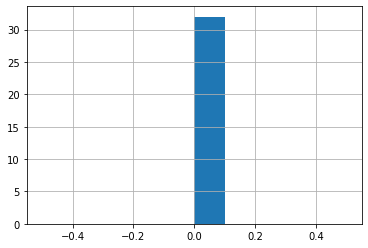

taux de NaN par entrée:


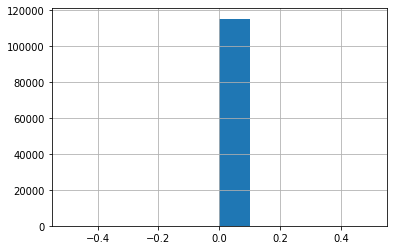

---------------------------------------------
nb doublons :
22088
---------------------------------------------
pour la catégorie : distance_cust_sell
--------------------
Max:
 79.60090004675483
min:
 0.0
moy:
 5.526475007994134
med:
 4.073544298306043
mod:
 0    0.0
dtype: float64
var:
 28.415541486669326
ect:
 5.330622992359273
skw:
 1.6457818431023037
kur:
 2.8286763551100775
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


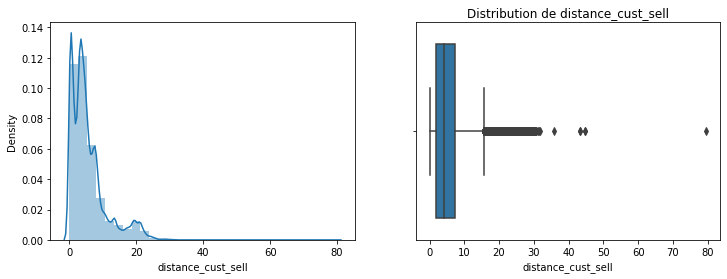

pour la catégorie : nb_com_moy
--------------------
Max:
 17
min:
 1
moy:
 1.090594780076947
med:
 1.0
mod:
 0    1
dtype: int64
var:
 0.1659373295056637
ect:
 0.4073540591496097
skw:
 12.565675756574123
kur:
 350.04146675011003
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


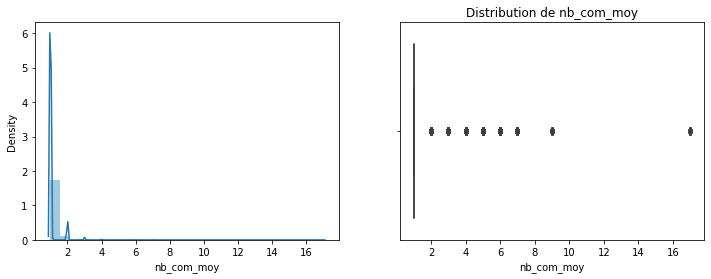

pour la catégorie : nb_pdt_com_moy
--------------------
Max:
 21.0
min:
 1.0
moy:
 1.3833763224074649
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 1.1632382268930845
ect:
 1.0785352228337675
skw:
 6.479862825806438
kur:
 73.40935401101608
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


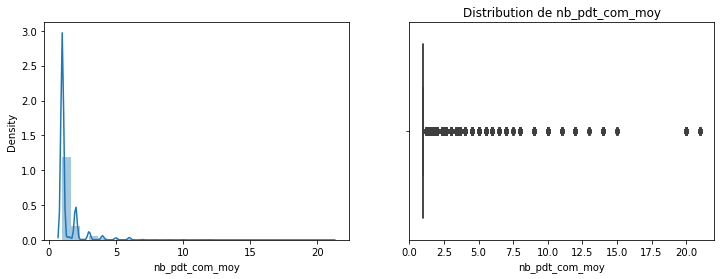

pour la catégorie : montant_moy
--------------------
Max:
 8.815073088844462
min:
 -0.16251892949777494
moy:
 4.326502895773621
med:
 4.31748811353631
mod:
 0    4.092677
dtype: float64
var:
 0.8246916672321192
ect:
 0.9081253587650326
skw:
 0.25548131207679153
kur:
 0.5283921282590143
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


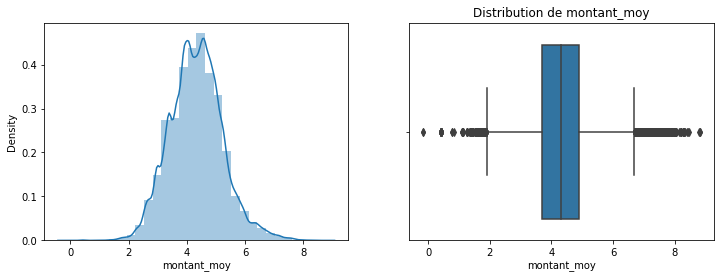

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pour la catégorie : note_moy
--------------------
Max:
 5.0
min:
 1.0
moy:
 4.065762548188205
med:
 5.0
mod:
 0    5.0
dtype: float64
var:
 1.8099209167245434
ect:
 1.3453330133184658
skw:
 -1.3236083015838078
kur:
 0.4137071262199177
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


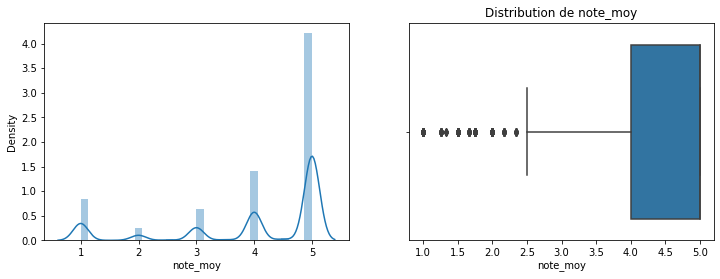

pour la catégorie : heure_moy_achat
--------------------
Max:
 23.0
min:
 0.0
moy:
 14.761504862421202
med:
 15.0
mod:
 0    16.0
dtype: float64
var:
 27.700865470328
ect:
 5.263161167048564
skw:
 -0.5969424316599063
kur:
 0.22696646651403718
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


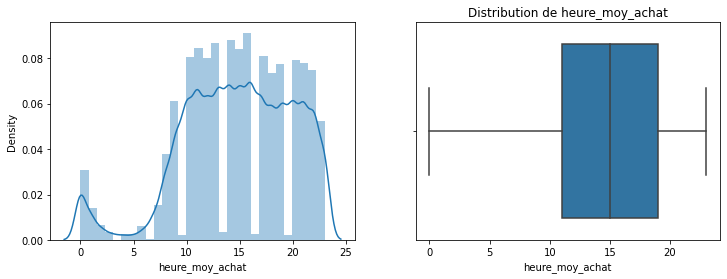

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pour la catégorie : jour_moy_achat
--------------------
Max:
 6.0
min:
 0.0
moy:
 2.747220564828711
med:
 3.0
mod:
 0    1.0
dtype: float64
var:
 3.7607871127214976
ect:
 1.939274893541784
skw:
 0.174629887002646
kur:
 -1.1320420399858242
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


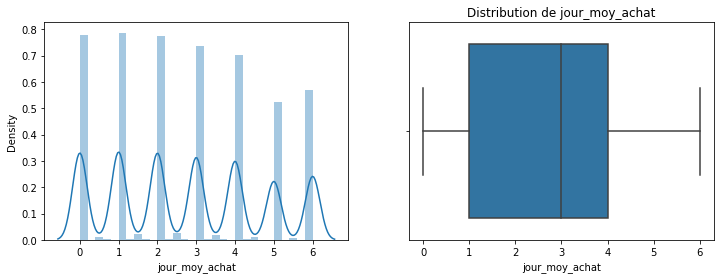

pour la catégorie : delai_dernier_achat
--------------------
Max:
 713
min:
 0
moy:
 237.6332882742366
med:
 218.0
mod:
 0    277
dtype: int64
var:
 23263.148268342084
ect:
 152.52261559631765
skw:
 0.4474435193847405
kur:
 -0.6550195664890515
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


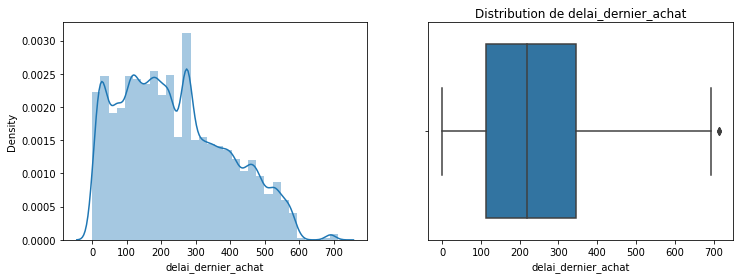

pour la catégorie : delais_com_min_max
--------------------
Max:
 633
min:
 0
moy:
 6.071046064261204
med:
 0.0
mod:
 0    0
dtype: int64
var:
 1432.302558777584
ect:
 37.84577332777841
skw:
 8.016277542334146
kur:
 73.13792348628392
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


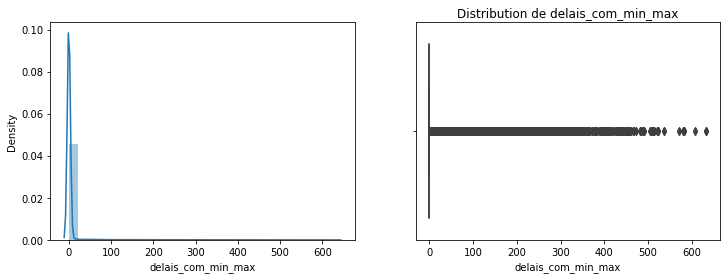

pour la catégorie : delai_livrai_moy
--------------------
Max:
 209.0
min:
 0.0
moy:
 12.020271724509033
med:
 10.0
mod:
 0    7.0
dtype: float64
var:
 87.88826449823378
ect:
 9.37487410572717
skw:
 3.8937883054006
kur:
 41.21926839948377
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


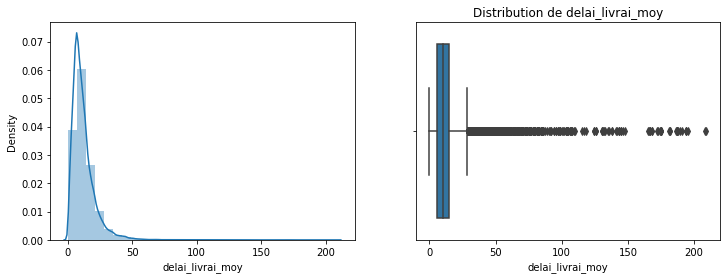

pour la catégorie : appliances
--------------------
Max:
 21.0
min:
 0.0
moy:
 0.15873799868288793
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.7719583255542166
ect:
 0.8786115896994625
skw:
 13.636421035077909
kur:
 260.66135270480805
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


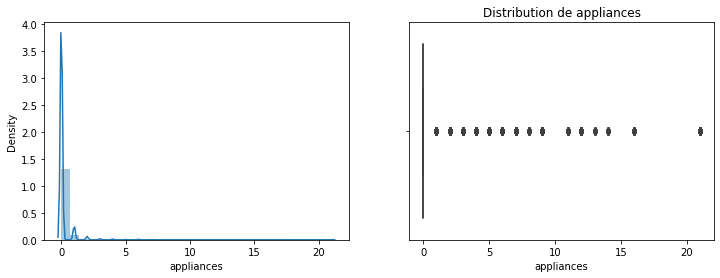

pour la catégorie : health_beauty
--------------------
Max:
 24.0
min:
 0.0
moy:
 0.2189265536723164
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.6303752090185784
ect:
 0.7939617176026678
skw:
 12.436127992106451
kur:
 282.18910876890743
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


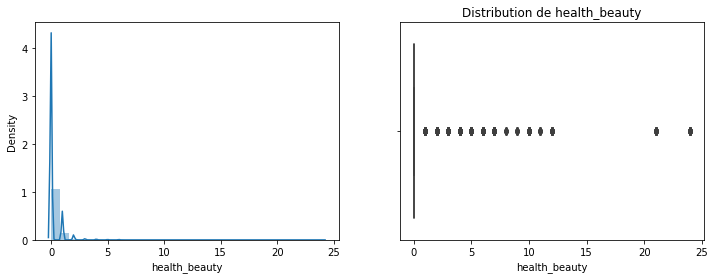

pour la catégorie : construction
--------------------
Max:
 20.0
min:
 0.0
moy:
 0.10101902880316106
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.3002176715034912
ect:
 0.5479212274620242
skw:
 14.274364261806491
kur:
 370.26611735118104
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


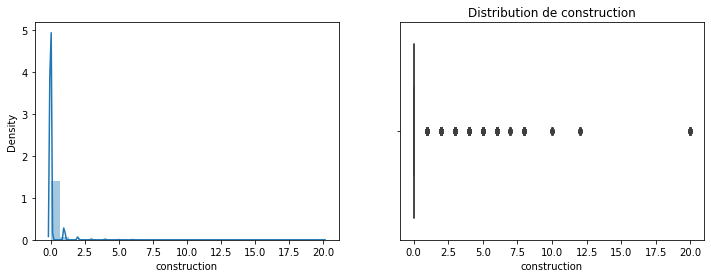

pour la catégorie : garden_pets
--------------------
Max:
 35.0
min:
 0.0
moy:
 0.11300301549339711
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.6785148493548282
ect:
 0.8237201280500727
skw:
 26.369958559902244
kur:
 1011.924149532591
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


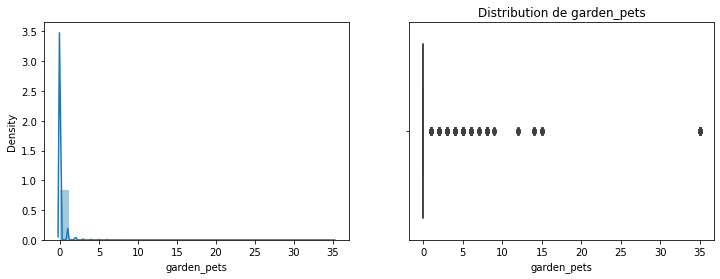

pour la catégorie : office
--------------------
Max:
 38.0
min:
 0.0
moy:
 0.09673841461301168
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.8686355095099682
ect:
 0.9320061746093575
skw:
 28.133688675197803
kur:
 1016.4671360762243
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


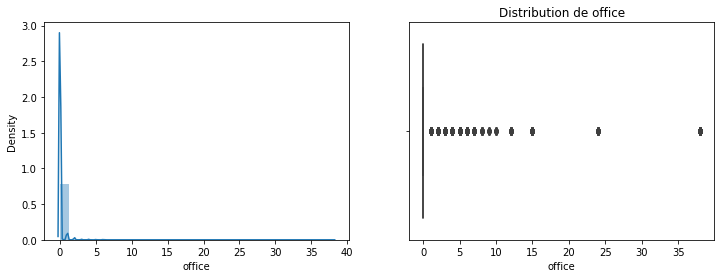

pour la catégorie : home
--------------------
Max:
 54.0
min:
 0.0
moy:
 0.4516394579044054
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 3.7475919362765384
ect:
 1.935869813876062
skw:
 16.689799456738115
kur:
 404.78312966435124
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


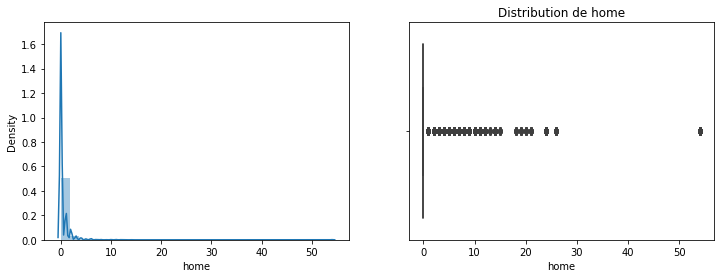

pour la catégorie : electronics
--------------------
Max:
 24.0
min:
 0.0
moy:
 0.25319746282624517
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.9767041882091728
ect:
 0.9882834553958559
skw:
 12.42331940930438
kur:
 237.13039272054516
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


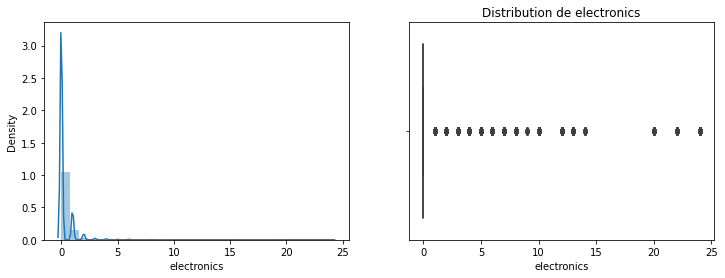

pour la catégorie : activities
--------------------
Max:
 21.0
min:
 0.0
moy:
 0.19956847249662057
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.5022420237600679
ect:
 0.7086903581678446
skw:
 10.18442777259797
kur:
 200.29044696337593
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


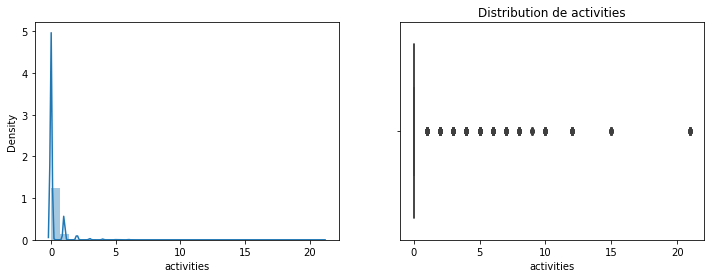

pour la catégorie : other
--------------------
Max:
 13.0
min:
 0.0
moy:
 0.07933867110325465
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.20194772388598214
ect:
 0.44938594090823775
skw:
 12.467344349982291
kur:
 240.84431459774152
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


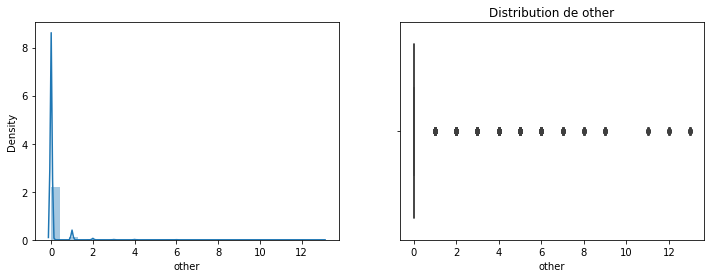

pour la catégorie : fashion
--------------------
Max:
 12.0
min:
 0.0
moy:
 0.13048941111226647
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.3006651412266985
ect:
 0.5483294094125342
skw:
 8.954506327106412
kur:
 131.50711742809176
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


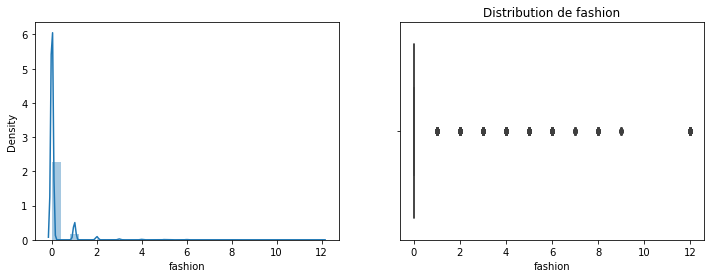

pour la catégorie : food
--------------------
Max:
 11.0
min:
 0.0
moy:
 0.019496724550275554
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.06654996681025574
ect:
 0.2579728024623056
skw:
 23.757820298647744
kur:
 751.0419101898239
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


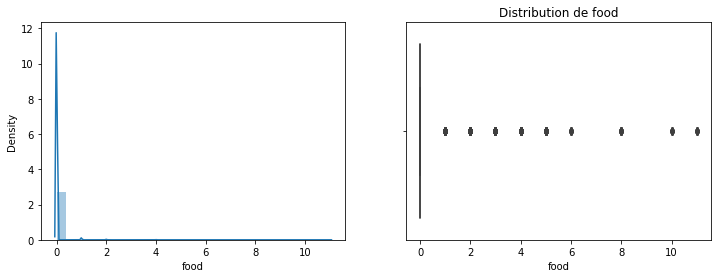

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pour la catégorie : credit_card
--------------------
Max:
 24.0
min:
 0.0
moy:
 1.1718831236352292
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 1.8757281061309712
ect:
 1.3695722347254895
skw:
 5.665337301799631
kur:
 61.95100703861726
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


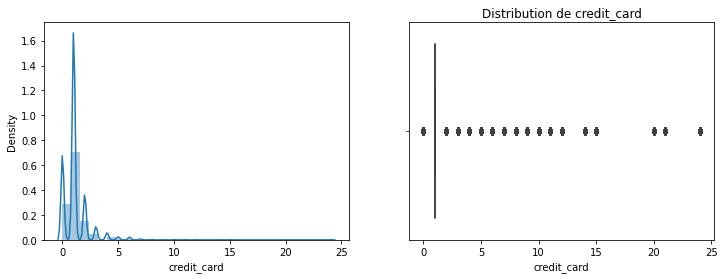

pour la catégorie : voucher
--------------------
Max:
 75.0
min:
 0.0
moy:
 0.3064711795085092
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 6.291798614631186
ect:
 2.5083457924758275
skw:
 20.473041684399046
kur:
 542.0827227546471
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


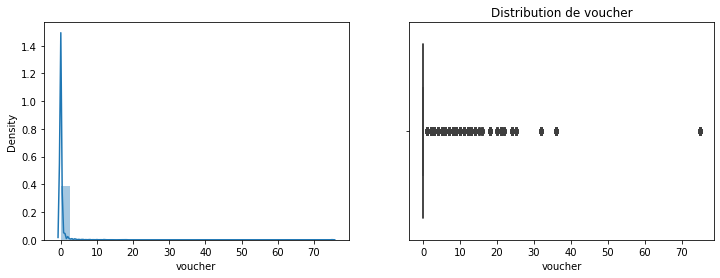

pour la catégorie : boleto
--------------------
Max:
 20.0
min:
 0.0
moy:
 0.32358497105819556
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.9296676581880862
ect:
 0.9641927494998529
skw:
 6.864204152423297
kur:
 77.00154843485426
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


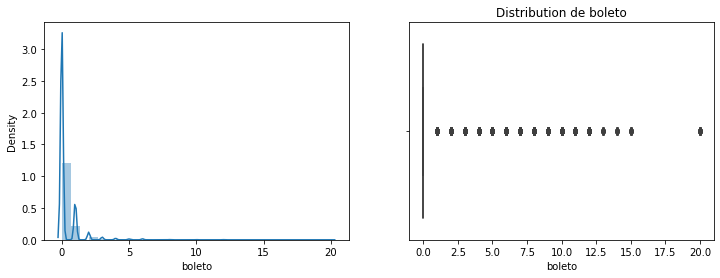

pour la catégorie : debit_card
--------------------
Max:
 7.0
min:
 0.0
moy:
 0.02013795015770684
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.03988769370060074
ect:
 0.19971903690084414
skw:
 16.543444027264503
kur:
 387.48183479042825
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


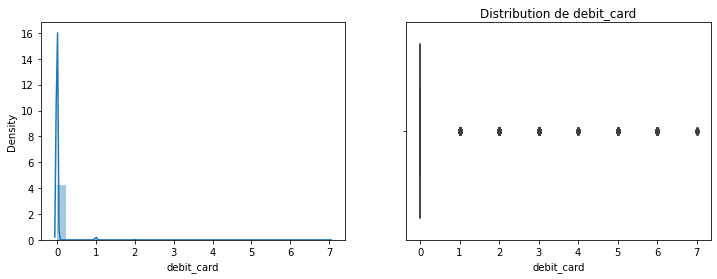

pour la catégorie : not_defined
--------------------
Max:
 3.0
min:
 0.0
moy:
 7.798689820110221e-05
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.00023395461264787376
ect:
 0.015295574936819921
skw:
 196.12750947053792
kur:
 38464.66658001291
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


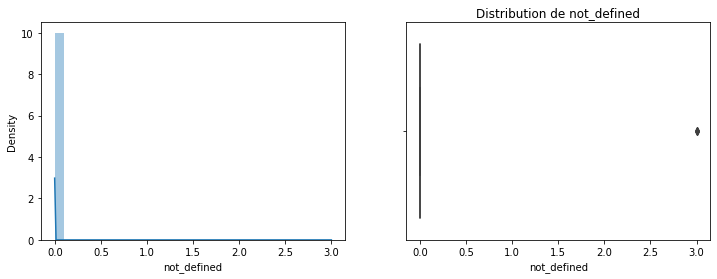

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pour la catégorie : zip_code
--------------------
Max:
 99980
min:
 1003
moy:
 35005.45627534574
med:
 24240.0
mod:
 0    24220
dtype: int64
var:
 890547465.8588623
ect:
 29842.041918388597
skw:
 0.7898581385393094
kur:
 -0.7741338769123591
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


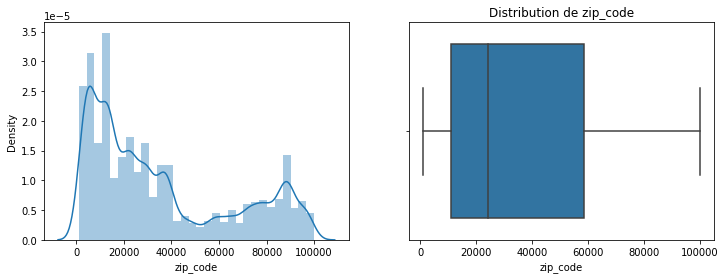

pour la catégorie : geo_customer_lat
--------------------
Max:
 42.18400274298598
min:
 -33.68988966175979
moy:
 -21.239244296025706
med:
 -22.927957956244374
mod:
 0   -22.90366
dtype: float64
var:
 30.887467958841846
ect:
 5.557649499459448
skw:
 1.6390319315130495
kur:
 3.120392815428272
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


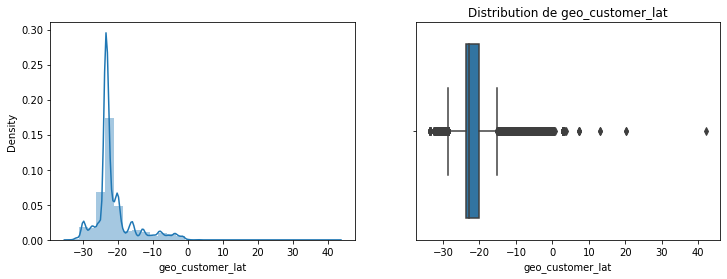

pour la catégorie : geo_customer_lng
--------------------
Max:
 -8.723762147513938
min:
 -72.66882069699506
moy:
 -46.200535840016336
med:
 -46.63208110732657
mod:
 0   -43.107256
dtype: float64
var:
 16.322438937570777
ect:
 4.040103827573096
skw:
 0.012274794837073359
kur:
 2.0651822653926835
--------------------


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


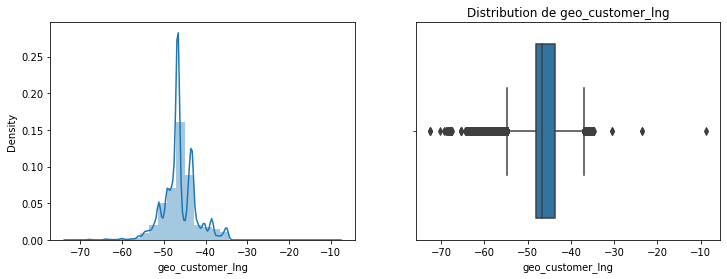

nb entrée unique pour l'indicateur : customer_unique_id : 
 93082
nb entrée unique pour l'indicateur : distance_cust_sell : 
 88570
nb entrée unique pour l'indicateur : nb_com_moy : 
 9
nb entrée unique pour l'indicateur : nb_pdt_com_moy : 
 39
nb entrée unique pour l'indicateur : montant_moy : 
 7764
nb entrée unique pour l'indicateur : note_moy : 
 34
nb entrée unique pour l'indicateur : heure_moy_achat : 
 99
nb entrée unique pour l'indicateur : jour_moy_achat : 
 45
nb entrée unique pour l'indicateur : delai_dernier_achat : 
 611
nb entrée unique pour l'indicateur : delais_com_min_max : 
 413
nb entrée unique pour l'indicateur : delai_livrai_moy : 
 247
nb entrée unique pour l'indicateur : appliances : 
 16
nb entrée unique pour l'indicateur : health_beauty : 
 15
nb entrée unique pour l'indicateur : construction : 
 12
nb entrée unique pour l'indicateur : garden_pets : 
 14
nb entrée unique pour l'indicateur : office : 
 15
nb entrée unique pour l'indicateur : home : 
 23
nb entré

In [ ]:
explor_set(glo_dat)